## Draft notebook for DSfB course, analysing a dataset of ecological data on UK plants.

### Information on the dataset
     http://ecoflora.org.uk/
     
The Ecological Flora of the British Isles is a database constructed from a wide variety of sources by Dr Helen Peat and Professor Alastair Fitter at the University of York, with financial support from the British Ecological Society and the Natural Environment Research Council. It consists of data on 3842 species of higher plants that occur in the British Isles (of which some 2000 species including all the British Natives and many common introductions have ecological traits entered), together with the bibliography of sources. This version has been produced by Dr Henry Ford.
     
The data comprises information on taxonomy (family, genus, specific name, authority, and vernacular name, together with common synonyms), a suite of over 130 ecological and morphological characteristics, vice-county distribution in Britain, European distribution by country, mycorrhizal associations, associated phytophagous insects and fungi. The data are obtained from the literature and the coverage varies greatly between species. The data set is therefore incomplete"

![alt text](Ecoflor.png)

### Importing the data into pandas
    Examining dataframe
    Finding problematic entries

##### Setting up the basic analysis environment

In [1]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
np.set_printoptions(precision=5, suppress=True)  # suppress scientific floatation 
sns.set(color_codes=True)
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

Reading in the data

In [2]:
EcoFlora = pd.read_csv('../Data_sets/EcoFlora.txt', sep="\t", encoding='latin-1')

Checking content

In [3]:
EcoFlora.head(3)

LastName FirstName  DatasetID                                Dataset  \
0     Ford     Henry        174  Ecological Flora of the British Isles   
1     Ford     Henry        174  Ecological Flora of the British Isles   
2     Ford     Henry        174  Ecological Flora of the British Isles   

                                         SpeciesName  AccSpeciesID  \
0  Anthyllis vulneraria subsp. polyphylla (DC.) N...        203738   
1            Beta vulgaris subsp. cicla (L.) Arcang.          7314   
2              Brassica napus subsp. rapifera Metzg.          8255   

                           AccSpeciesName  ObservationID  ObsDataID  TraitID  \
0  Anthyllis vulneraria subsp. polyphylla        1345934    9604422    827.0   
1                           Beta vulgaris        1345935    9604423    827.0   
2                          Brassica napus        1345936    9604424    827.0   

                                TraitName  DataID        DataName OriglName  \
0  Species occurrence range: origin zonal     598  Species origin  nativity   
1  Species occurrence range: origin zonal     598  Species origin  nativity   
2  Species occurrence range: origin zonal     598  Species origin  nativity   

                    OrigValueStr OrigUnitStr ValueKindName OrigUncertaintyStr  \
0  Archeophyt in British Islands         NaN           NaN                NaN   
1  Archeophyt in British Islands         NaN           NaN                NaN   
2  Archeophyt in British Islands         NaN           NaN                NaN   

  UncertaintyName  Replicates  StdValue UnitName  RelUncertaintyPercent  \
0             NaN         NaN       NaN      NaN                    NaN   
1             NaN         NaN       NaN      NaN                    NaN   
2             NaN         NaN       NaN      NaN                    NaN   

   OrigObsDataID  ErrorRisk  \
0            NaN        NaN   
1            NaN        NaN   
2            NaN        NaN   

                                           Reference Comment  Unnamed: 27  
0  Fitter, A. H. and H. J. Peat 1994. The Ecologi...     NaN          NaN  
1  Fitter, A. H. and H. J. Peat 1994. The Ecologi...     NaN          NaN  
2  Fitter, A. H. and H. J. Peat 1994. The Ecologi...     NaN          NaN

What kind of things are in the columns?

In [4]:
EcoFlora.columns

Index(['LastName', 'FirstName', 'DatasetID', 'Dataset', 'SpeciesName',
       'AccSpeciesID', 'AccSpeciesName', 'ObservationID', 'ObsDataID',
       'TraitID', 'TraitName', 'DataID', 'DataName', 'OriglName',
       'OrigValueStr', 'OrigUnitStr', 'ValueKindName', 'OrigUncertaintyStr',
       'UncertaintyName', 'Replicates', 'StdValue', 'UnitName',
       'RelUncertaintyPercent', 'OrigObsDataID', 'ErrorRisk', 'Reference',
       'Comment', 'Unnamed: 27'],
      dtype='object')

This is standard database format for TRY - the traits measured are listed in DataName and teh value in OrigValueStr, the units of measure in OrigUnitStr.  
What kind of data types are the columns?  

In [5]:
EcoFlora.dtypes

LastName                  object
FirstName                 object
DatasetID                  int64
Dataset                   object
SpeciesName               object
AccSpeciesID               int64
AccSpeciesName            object
ObservationID              int64
ObsDataID                  int64
TraitID                  float64
TraitName                 object
DataID                     int64
DataName                  object
OriglName                 object
OrigValueStr              object
OrigUnitStr               object
ValueKindName             object
OrigUncertaintyStr        object
UncertaintyName           object
Replicates               float64
StdValue                 float64
UnitName                  object
RelUncertaintyPercent    float64
OrigObsDataID            float64
ErrorRisk                float64
Reference                 object
Comment                   object
Unnamed: 27              float64
dtype: object

Mixture of floats and objects.  
What data is there?

In [6]:
EcoFlora.iloc[1]

LastName                                                              Ford
FirstName                                                            Henry
DatasetID                                                              174
Dataset                              Ecological Flora of the British Isles
SpeciesName                        Beta vulgaris subsp. cicla (L.) Arcang.
AccSpeciesID                                                          7314
AccSpeciesName                                               Beta vulgaris
ObservationID                                                      1345935
ObsDataID                                                          9604423
TraitID                                                                827
TraitName                           Species occurrence range: origin zonal
DataID                                                                 598
DataName                                                    Species origin
OriglName                

What's it saying there about beetroot?
This is a single entry with information on the Species occurrence, saying it's an Archeophyt in British Islands.

How much data for each trait is there?  
Count the number of occurances of each trait  in teh TraitName column  

In [7]:
EcoFlora['TraitName'].value_counts()

Species occurrence range characteristics                                                                        35891
Leaf shape                                                                                                      12471
Plant reproductive phenology timing                                                                              9911
Species tolerance to shade                                                                                       8848
Plant height vegetative                                                                                          5511
Flower sexual syndrome (dichogamy, cleistogamy, dioecious, monoecious)                                           5418
Plant life form (Raunkiaer life form)                                                                            5111
Plant nutrition mode (heterotrophy)                                                                              4912
Plant defence mechanisms: physical                      

Wide range - all have Species occurrence range characteristics (whatever these are), very few have infomation on Bud physical defence and root hairs.

### Merging data - adding physiological data
We will add in more trait data from the global leaf traits database (https://www.try-db.org/TryWeb/Home.php)



In [5]:
leaf_df = pd.read_csv('../Data_sets/Global_leaf_traits.txt', sep="\t",encoding='latin-1')

/Users/catherine/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [64]:
leaf_df.shape

(10932410, 28)

BIG dataset!

Which species from the physiology dataframe are in Ecoflora?

In [6]:
in_both = leaf_df.loc[leaf_df['AccSpeciesName'].isin(EcoFlora['AccSpeciesName'])]

In [62]:
in_both.shape

(2867466, 28)

How many species is this?

In [66]:
len(in_both['AccSpeciesName'].unique())

1394

Add this data in.

In [7]:
UKFlora = pd.concat([EcoFlora, in_both])

Lots of infomation, but database unweildly.

Pickle this it save having to rebuild it

In [ ]:
UKFlora.to_pickle("./UKFlora.pkl")

To restore:

In [2]:
UKFlora = pd.read_pickle("../Notebooks/UKFlora.pkl")

Or can save as csv and restore from that

In [16]:
UKFlora.to_csv(r"./UKFlora.csv")

In [19]:
UKFlora = pd.read_csv('UKFlora.csv', sep=",",encoding='latin-1')

/Users/catherine/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Which columns are informative?  
Don't need the First 4 on the dataset:
0    LastName    
1    FirstName
2    DatasetID
3    Dataset



In [20]:
UKFlora.tail(3)

Unnamed: 0    LastName FirstName  DatasetID                 Dataset  \
3234840    10930814  Sheremetev     Serge        412  The Global Leaf Traits   
3234841    10930815  Sheremetev     Serge        412  The Global Leaf Traits   
3234842    10930816  Sheremetev     Serge        412  The Global Leaf Traits   

                             SpeciesName  AccSpeciesID   AccSpeciesName  \
3234840  Kochia densiflora (Moq.) Aellen          6962  Bassia scoparia   
3234841  Kochia densiflora (Moq.) Aellen          6962  Bassia scoparia   
3234842  Kochia densiflora (Moq.) Aellen          6962  Bassia scoparia   

         ObservationID  ObsDataID  TraitID  \
3234840        3166824   40704005     48.0   
3234841        3166824   40704000    224.0   
3234842        3166824   40704003     46.0   

                                                 TraitName  DataID  \
3234840  Leaf density (leaf tissue density, leaf dry ma...      55   
3234841          Species genotype: chromosome cDNA content     603   
3234842                                     Leaf thickness      53   

                        DataName OriglName OrigValueStr    OrigUnitStr  \
3234840      Leaf tissue density       LTD          150         mg/cm3   
3234841  Chromosome cDNA content   2C (pg)         2.24  pg/2C-Nucleus   
3234842           Leaf thickness    LT, mm        0.421             mm   

        ValueKindName OrigUncertaintyStr UncertaintyName Replicates  StdValue  \
3234840        Single                NaN             NaN        NaN     0.150   
3234841        Single                NaN             NaN        NaN     2.240   
3234842        Single                NaN             NaN          9     0.421   

        UnitName  RelUncertaintyPercent  OrigObsDataID  ErrorRisk Reference  \
3234840    g/cm3                    NaN            NaN   1.918510    unpub.   
3234841       pg                    NaN            NaN   0.689187    unpub.   
3234842       mm                    NaN            NaN   2.193600    unpub.   

                             Comment  Unnamed: 27  
3234840  Leaf tissue density, mg/cm3          NaN  
3234841                          NaN          NaN  
3234842           Leaf thickness, mm          NaN

Do I have empty columns?

In [21]:
UKFlora.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3234843 entries, 0 to 3234842
Data columns (total 29 columns):
Unnamed: 0               3234843 non-null int64
LastName                 3234843 non-null object
FirstName                3234843 non-null object
DatasetID                3234843 non-null int64
Dataset                  3234843 non-null object
SpeciesName              3234843 non-null object
AccSpeciesID             3234843 non-null int64
AccSpeciesName           3234843 non-null object
ObservationID            3234843 non-null int64
ObsDataID                3234843 non-null int64
TraitID                  508792 non-null float64
TraitName                508792 non-null object
DataID                   3234843 non-null int64
DataName                 3234843 non-null object
OriglName                3226036 non-null object
OrigValueStr             3218374 non-null object
OrigUnitStr              2018757 non-null object
ValueKindName            219060 non-null object
OrigUncertain

No - all have something to say.  
What does this dataset say about Daffodils?

In [22]:
daffs = UKFlora[UKFlora['AccSpeciesName']=='Narcissus pseudonarcissus']

In [23]:
daffs

Unnamed: 0    LastName FirstName  DatasetID  \
54              54        Ford     Henry        174   
662            662        Ford     Henry        174   
2937          2937        Ford     Henry        174   
156986      156986        Ford     Henry        174   
156987      156987        Ford     Henry        174   
156988      156988        Ford     Henry        174   
156989      156989        Ford     Henry        174   
156990      156990        Ford     Henry        174   
156991      156991        Ford     Henry        174   
156992      156992        Ford     Henry        174   
156993      156993        Ford     Henry        174   
156994      156994        Ford     Henry        174   
156995      156995        Ford     Henry        174   
156996      156996        Ford     Henry        174   
156997      156997        Ford     Henry        174   
156998      156998        Ford     Henry        174   
156999      156999        Ford     Henry        174   
157000      157000        Ford     Henry        174   
157001      157001        Ford     Henry        174   
157002      157002        Ford     Henry        174   
157003      157003        Ford     Henry        174   
157004      157004        Ford     Henry        174   
157005      157005        Ford     Henry        174   
157006      157006        Ford     Henry        174   
157007      157007        Ford     Henry        174   
157008      157008        Ford     Henry        174   
157009      157009        Ford     Henry        174   
157010      157010        Ford     Henry        174   
157011      157011        Ford     Henry        174   
157012      157012        Ford     Henry        174   
157013      157013        Ford     Henry        174   
157014      157014        Ford     Henry        174   
157015      157015        Ford     Henry        174   
157016      157016        Ford     Henry        174   
157017      157017        Ford     Henry        174   
157018      157018        Ford     Henry        174   
157019      157019        Ford     Henry        174   
157020      157020        Ford     Henry        174   
157021      157021        Ford     Henry        174   
157022      157022        Ford     Henry        174   
157023      157023        Ford     Henry        174   
157024      157024        Ford     Henry        174   
157025      157025        Ford     Henry        174   
157026      157026        Ford     Henry        174   
157027      157027        Ford     Henry        174   
157028      157028        Ford     Henry        174   
157029      157029        Ford     Henry        174   
157030      157030        Ford     Henry        174   
157031      157031        Ford     Henry        174   
157032      157032        Ford     Henry        174   
157033      157033        Ford     Henry        174   
157034      157034        Ford     Henry        174   
157035      157035        Ford     Henry        174   
157036      157036        Ford     Henry        174   
157037      157037        Ford     Henry        174   
157038      157038        Ford     Henry        174   
157039      157039        Ford     Henry        174   
157040      157040        Ford     Henry        174   
157041      157041        Ford     Henry        174   
157042      157042        Ford     Henry        174   
157043      157043        Ford     Henry        174   
157044      157044        Ford     Henry        174   
157045      157045        Ford     Henry        174   
157046      157046        Ford     Henry        174   
157047      157047        Ford     Henry        174   
157048      157048        Ford     Henry        174   
157049      157049        Ford     Henry        174   
157050      157050        Ford     Henry        174   
157051      157051        Ford     Henry        174   
157052      157052        Ford     Henry        174   
157053      157053        Ford     Henry        174   
157054      157054        Ford     Henry        

It's listed as an archeophyte (part of the UK"s original flora) and a Neophyte (introduced since humans).  It grows on infertile slow draining, moist soil of pH 4 - 7.8.  It can manage in deep, light or mid shade and grows from sea level up to 274m.  It's usually common where it is found and numbers are increasing.  It's a European native found in 7 countries, part of the southern temperate biome with a suboceanic eastern limit, reaching North to 55-60 latitude.  It's found in regions with an average January temp of 3.7'C and July tmep of 15.6'C and 920mm of rain annually. Average conditioan also include 11320 KJm2 per day of solar radiation, 0.84kPa warer vapour pressure and 2.8 m/s wind.

It's non woody and self supporting, usually to 40cm tall with little spread.  Leaves are simple, entire and pointed, more than 3x longer than wide and without petioles. they are 10-100 cm2 with stomata on both surfaces - 68 per mm2 on the lower side, 65 per mm2 on the upper side.  Leaves are produced inthe spring and last for 2-6 months.  The roots are adventitious - emerging from the hypocotl and grow down up to 10 cm.  Photosyntheisis is via the C3 pathway.  They are frost resistant.  Shoots last less than one year and it takes 2-5 years for a plant to flower, but can be up to 20 (!).  The plants flower multiple times and have bulbs which spread clonally in patches and flower in March and April.  Pollen grains are 63um diameter and are transfered by insects between the hermaphrodite flowers.  An average of 89 seeds of 3mm diameter are dispersed from each flower in summer by the wind, to germinate in autumn/winter.  The seeds can last for 3-12 months in the soil seed bank. 

They have usually have arbuscular microrhiza
They have 14 (or 18) chromosomes and are diploid. 2c is 30pg. Leaves are 43% by weight Nitrogen adn have a specific leaf area of 192.93cm2/g

##### Several DataName entries for some traits for this species - some contradictory

### Grouping  
How many types of data are there?  
Can we re-arrange into one colum per data type?  
   

In [24]:
len(UKFlora['DataName'].unique())

261

In [25]:
UKFlora['DataName'].unique()

array(['Species origin', 'Species nutrient requirements (in soil)',
       'Reference / source', 'Tolerance to shade',
       'Species status (nativity at growth location)',
       'Range: 3. continents where native', 'Stem self-supporting',
       'Plant height (unspecified if vegetative or reproductive)',
       'Leaf compoundness', 'Plant photosynthetic pathway', 'Carnivory',
       'Nutrition (autotroph versus heterotroph)',
       'Dicliny (monoeceous, dioecious, hermaphrodite)',
       'Species soil moisture requirements (drainage)',
       'Species pH requirement (soil, extreme maximum)',
       'Species pH requirement ( soil, extreme minimum)',
       'Altitude (minimum recorded)', 'First historical record: 1. date',
       'First historical record: 2. site',
       'Range: 4. continents where introduced', 'SN Index', 'EW Index',
       'Woodiness',
       'Spread (plant height versus plant width relationshp))',
       'Leaf shape: 2. outline', 'Leaf shape: 3. pointed/round',
 

Many of the traits are categorical.  
Can I list which are quantitative?  
Only once sorted in a column of their own  

### How complete is this dataset?

In [64]:
minimal = UKFlora[['AccSpeciesName', 'DataName', 'OrigValueStr']].drop_duplicates()

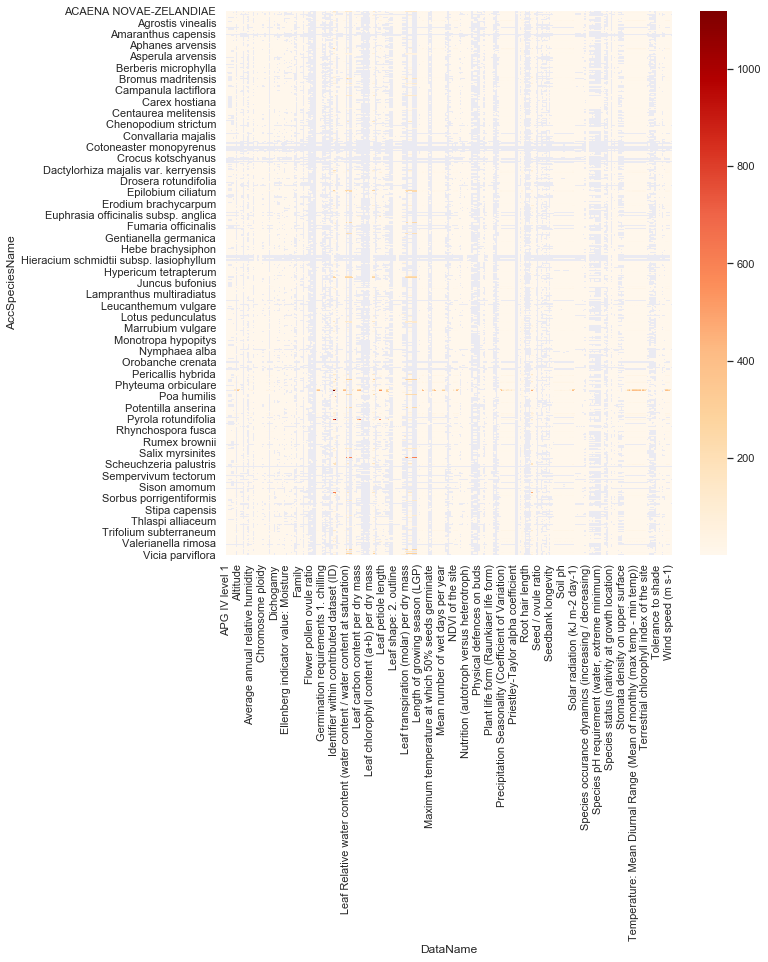

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(
    minimal.groupby(['AccSpeciesName', 'DataName'])['OrigValueStr'].size().unstack(),
    cmap = 'OrRd'
)

A few species with little data and many traits with data from few species.  
A few traits with very high numbers of observation from a very small number of species.

### Switching to wide format

How many duplicates do I have, with the same AccSpeciesName and DataName?

In [68]:
len(minimal['AccSpeciesName']) - len(minimal.drop_duplicates(subset=['AccSpeciesName', 'DataName']))

444049

MANY entries of same data for same species.  Would be foolish to summarize by species, better to keep as a group ID.  
BUT would like columns of data names, rows of individuals with infomation.  Sample name not species name.  
Multi-index pivot table with ObservationID and AccSpeciesName as index, DataName as columns and OrigValueStr as the values.  
'aggfunc=lambda x: x' means it will not try and average descriptions of leaf shape, but just copy the value across without processing

In [70]:
By_obs = pd.pivot_table(UKFlora, index=['AccSpeciesName','ObservationID'], columns='DataName', values='OrigValueStr', aggfunc=lambda x: x)

Index should not be species - re set

In [71]:
By_obs = By_obs.reset_index()

In [72]:
By_obs.head(10)

DataName          AccSpeciesName  ObservationID APG IV level 1 APG IV level 2  \
0         ACAENA NOVAE-ZELANDIAE        1349853            NaN            NaN   
1         ACAENA NOVAE-ZELANDIAE        1454149            NaN            NaN   
2         ACAENA NOVAE-ZELANDIAE        1454150            NaN            NaN   
3         ACAENA NOVAE-ZELANDIAE        1454151            NaN            NaN   
4         ACAENA NOVAE-ZELANDIAE        1454152            NaN            NaN   
5         ACAENA NOVAE-ZELANDIAE        1454153            NaN            NaN   
6         ACAENA NOVAE-ZELANDIAE        1454154            NaN            NaN   
7         ACAENA NOVAE-ZELANDIAE        1454155            NaN            NaN   
8         ACAENA NOVAE-ZELANDIAE        1454156            NaN            NaN   
9         ACAENA NOVAE-ZELANDIAE        1454157            NaN            NaN   

DataName APG IV level 3 APG IV level 4 APG IV level 5  \
0                   NaN            NaN            NaN   
1                   NaN            NaN            NaN   
2                   NaN            NaN            NaN   
3                   NaN            NaN            NaN   
4                   NaN            NaN            NaN   
5                   NaN            NaN            NaN   
6                   NaN            NaN            NaN   
7                   NaN            NaN            NaN   
8                   NaN            NaN            NaN   
9                   NaN            NaN            NaN   

DataName Actual EvapoTranspiration After-ripening requirement Altitude  \
0                              NaN                        NaN      NaN   
1                              NaN                        NaN      NaN   
2                              NaN                        NaN      NaN   
3                              NaN                        NaN      NaN   
4                              NaN                        NaN      NaN   
5                              NaN                        NaN      NaN   
6                              NaN                        NaN      NaN   
7                              NaN                        NaN      NaN   
8                              NaN                        NaN      NaN   
9                              NaN                        NaN      NaN   

DataName Altitude (maximum recorded) Altitude (minimum recorded)  \
0                                NaN                         NaN   
1                                NaN                         NaN   
2                                NaN                         NaN   
3                                NaN                         NaN   
4                                NaN                         NaN   
5                                NaN                         NaN   
6                                NaN                           0   
7                                NaN                         NaN   
8                                NaN                         NaN   
9                                NaN                         NaN   

DataName Altitude (typical minimum) Annual precipitation  \
0                               NaN                  NaN   
1                               NaN                  NaN   
2                               NaN                  NaN   
3                               NaN                  NaN   
4                               NaN                  NaN   
5                               NaN                  NaN   
6                               NaN                  NaN   
7                               NaN                  NaN   
8                               NaN                  NaN   
9                               NaN                  NaN   

DataName Annual seed dispersal Appendages on dispersal unit  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3  

LOTS of NaNs!  Lots of ACAENA NOVAE-ZELANDIAE - commonly known as red bidibid, bidgee widgee, buzzy and piri-piri bur, is a small herbaceous, prostrate perennial, native to New Zealand, Australia and New Guinea, of the family Rosaceae.  it is regarded as invasive in Great Britain where it has established itself in places such as dune habitats on Lindisfarne

What does this dataframe have to say about beetroot?

In [34]:
Beetroot = By_obs[By_obs['AccSpeciesName'].str.match('Beta vulgaris')]

In [35]:
Beetroot.shape

(80, 257)

80 entries for Beetroot!  Most will be Nans.

In [36]:
Beetroot

DataName AccSpeciesName  ObservationID APG IV level 1 APG IV level 2  \
19255     Beta vulgaris        1345935            NaN            NaN   
19256     Beta vulgaris        1346683            NaN            NaN   
19257     Beta vulgaris        1348237            NaN            NaN   
19258     Beta vulgaris        1350012            NaN            NaN   
19259     Beta vulgaris        1466484            NaN            NaN   
19260     Beta vulgaris        1466485            NaN            NaN   
19261     Beta vulgaris        1466486            NaN            NaN   
19262     Beta vulgaris        1466487            NaN            NaN   
19263     Beta vulgaris        1466488            NaN            NaN   
19264     Beta vulgaris        1466489            NaN            NaN   
19265     Beta vulgaris        1466490            NaN            NaN   
19266     Beta vulgaris        1466491            NaN            NaN   
19267     Beta vulgaris        1466492            NaN            NaN   
19268     Beta vulgaris        1466493            NaN            NaN   
19269     Beta vulgaris        1466494            NaN            NaN   
19270     Beta vulgaris        1466495            NaN            NaN   
19271     Beta vulgaris        1466496            NaN            NaN   
19272     Beta vulgaris        1466497            NaN            NaN   
19273     Beta vulgaris        1466498            NaN            NaN   
19274     Beta vulgaris        1466499            NaN            NaN   
19275     Beta vulgaris        1466500            NaN            NaN   
19276     Beta vulgaris        1466501            NaN            NaN   
19277     Beta vulgaris        1466502            NaN            NaN   
19278     Beta vulgaris        1466503            NaN            NaN   
19279     Beta vulgaris        1466504            NaN            NaN   
19280     Beta vulgaris        1466505            NaN            NaN   
19281     Beta vulgaris        1466506            NaN            NaN   
19282     Beta vulgaris        1466507            NaN            NaN   
19283     Beta vulgaris        1466508            NaN            NaN   
19284     Beta vulgaris        1466509            NaN            NaN   
19285     Beta vulgaris        1466510            NaN            NaN   
19286     Beta vulgaris        1466511            NaN            NaN   
19287     Beta vulgaris        1466512            NaN            NaN   
19288     Beta vulgaris        1466513            NaN            NaN   
19289     Beta vulgaris        1466514            NaN            NaN   
19290     Beta vulgaris        1466515            NaN            NaN   
19291     Beta vulgaris        1466516            NaN            NaN   
19292     Beta vulgaris        1466517            NaN            NaN   
19293     Beta vulgaris        1466518            NaN            NaN   
19294     Beta vulgaris        1466519            NaN            NaN   
19295     Beta vulgaris        1466520            NaN            NaN   
19296     Beta vulgaris        1466521            NaN            NaN   
19297     Beta vulgaris        1466522            NaN            NaN   
19298     Beta vulgaris        1466523            NaN            NaN   
19299     Beta vulgaris        1466524            NaN            NaN   
19300     Beta vulgaris        1466525            NaN            NaN   
19301     Beta vulgaris        1466526            NaN            NaN   
19302     Beta vulgaris        1466527            NaN            NaN   
19303     Beta vulgaris        1466528            NaN            NaN   
19304     Beta vulgaris        1466529            NaN            NaN   
19305     Beta vulgaris        1466530            NaN            NaN   
19306     Beta vulgaris        1466531            NaN            NaN   
19307     Beta vulgaris        1466532            NaN            NaN   
19308     Beta vulgaris        1466533            NaN            NaN   
19309     Beta vulgaris        1466534  

What do I actually have data for?  
Two Glopnet entries (data from Spain)  
The rest mostly NaNs for any one observation.  
Can I aggregate?  How many non-NaNs for each column?  

In [37]:
Beetroot.dtypes

DataName
AccSpeciesName                                                                                                                                    object
ObservationID                                                                                                                                      int64
APG IV level 1                                                                                                                                    object
APG IV level 2                                                                                                                                    object
APG IV level 3                                                                                                                                    object
APG IV level 4                                                                                                                                    object
APG IV level 5                                                           

All objects!  Need to make numeric if can.  

In [38]:
Beetroot = Beetroot.apply(pd.to_numeric, errors ='ignore')

In [39]:
Beetroot.dtypes

DataName
AccSpeciesName                                                                                                                                     object
ObservationID                                                                                                                                       int64
APG IV level 1                                                                                                                                     object
APG IV level 2                                                                                                                                     object
APG IV level 3                                                                                                                                     object
APG IV level 4                                                                                                                                    float64
APG IV level 5                                                     

Missing data. Most obs have dat for only one column

In [40]:
Beetroot.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 19255 to 19334
Columns: 257 entries, AccSpeciesName to Woodiness
dtypes: float64(198), int64(1), object(58)
memory usage: 161.2+ KB


In [41]:
Beetroot.count()

DataName
AccSpeciesName                                                                                                                                    80
ObservationID                                                                                                                                     80
APG IV level 1                                                                                                                                     2
APG IV level 2                                                                                                                                     2
APG IV level 3                                                                                                                                     2
APG IV level 4                                                                                                                                     0
APG IV level 5                                                                                   

Most columns with infomation have values for 1 - 3 observations.     
Is this low desity of data typical for all species?  
How can I tidy this up and aggregate where possible?  

Group by species and count number of obs

In [42]:
count_samples = By_obs.groupby('AccSpeciesName', as_index=False)['ObservationID'].count()

In [43]:
count_samples.columns = ['AccSpeciesName', 'Obs_count']

In [44]:
count_samples.head(3)

AccSpeciesName  Obs_count
0       ACAENA NOVAE-ZELANDIAE         89
1  ACAENA NOVAE-ZELANDIAE Kirk          1
2    ADIANTUM CAPILLUS-VENERIS         65

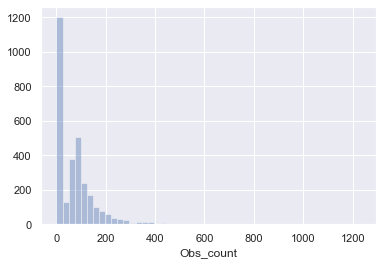

In [32]:
sns.distplot(count_samples['Obs_count'], kde=False);

In [45]:
count_samples.describe()

Obs_count
count  3031.000000
mean     75.483339
std      97.639701
min       1.000000
25%       1.000000
50%      67.000000
75%     104.000000
max    1233.000000

LOTS of varation in how many obs have data.  
Aggregate by species 

## Agregating by species  
<div class="alert alert-block alert-warning">
    Martin Jones helping.  
Concatenating string data, averaging numeric data.   
Write a function to check if the column is float or string get an appropriate summary.

In [3]:
type_map = {}

# make a dict mapping data name values to their types
# try float then string. don't bother with int as it won't work for columns with NaN values
# without messing about with deep pandas features: 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html#integer-na

for name, group in UKFlora.groupby('DataName'):
    for my_type in (float, str):
        try:
            coerced = group['OrigValueStr'].astype(my_type)
            type_map[name] = my_type
            break
        except:
            pass
type_map

{'APG IV level 1': str,
 'APG IV level 2': str,
 'APG IV level 3': str,
 'APG IV level 4': str,
 'APG IV level 5': str,
 'Actual EvapoTranspiration': float,
 'After-ripening requirement': str,
 'Altitude': float,
 'Altitude (maximum recorded)': str,
 'Altitude (minimum recorded)': str,
 'Altitude (typical minimum)': float,
 'Annual precipitation': float,
 'Annual seed dispersal': str,
 'Appendages on dispersal unit': str,
 'Average annual relative humidity': float,
 'Average number of ground frost days per year (sum) (FRS)': float,
 'British distribution (post 1949 records)': float,
 'Carnivory': str,
 'Change Index': float,
 'Chromosome cDNA content': float,
 'Chromosome number': str,
 'Chromosome ploidy': float,
 'Cleistogamy': str,
 'Clonality': str,
 'Cloud cover': float,
 'Comments, notes, methods': str,
 'Dataset (1)': str,
 'Dataset (2)': str,
 'Dichogamy': str,
 'Dicliny (monoeceous, dioecious, hermaphrodite)': str,
 'Dispersal syndrome (agent)': str,
 'Dispersal unit (dispersu

In [4]:
# takes a Series of values and aggregates them to a single value based on types in the dict
# for floats, take the median
# for strings, take the most common value
# replace this with your real logic :-)

def aggregate(values):
    species, data_name = values.name
    target_type = type_map[data_name]
    #print(data_name, target_type)

    coerced_data = values.astype(target_type)
    
    if target_type  == float:
        return coerced_data.median()
    else:
        return coerced_data.value_counts().index[0]
    
# make a summary table with the aggregated values
summary = UKFlora.groupby(['AccSpeciesName', 'DataName'])['OrigValueStr'].apply(aggregate).unstack()

In [5]:
# convert the columns in the summary table to the correct types
# using the dict from before

for c in summary.columns:
    summary[c] = summary[c].astype(type_map[c])

In [7]:
summary.shape

(3031, 261)

In [8]:
summary.head(3)

DataName                    APG IV level 1 APG IV level 2 APG IV level 3  \
AccSpeciesName                                                             
ACAENA NOVAE-ZELANDIAE            Eudicots  Core Eudicots    Superrosids   
ACAENA NOVAE-ZELANDIAE Kirk            nan            nan            nan   
ADIANTUM CAPILLUS-VENERIS              nan            nan            nan   

DataName                    APG IV level 4 APG IV level 5  \
AccSpeciesName                                              
ACAENA NOVAE-ZELANDIAE              Rosids         Fabids   
ACAENA NOVAE-ZELANDIAE Kirk            nan            nan   
ADIANTUM CAPILLUS-VENERIS              nan            nan   

DataName                     Actual EvapoTranspiration  \
AccSpeciesName                                           
ACAENA NOVAE-ZELANDIAE                             NaN   
ACAENA NOVAE-ZELANDIAE Kirk                        NaN   
ADIANTUM CAPILLUS-VENERIS                        494.0   

DataName                    After-ripening requirement  Altitude  \
AccSpeciesName                                                     
ACAENA NOVAE-ZELANDIAE                             nan      11.0   
ACAENA NOVAE-ZELANDIAE Kirk                        nan       NaN   
ADIANTUM CAPILLUS-VENERIS                          nan     327.0   

DataName                    Altitude (maximum recorded)  \
AccSpeciesName                                            
ACAENA NOVAE-ZELANDIAE                              nan   
ACAENA NOVAE-ZELANDIAE Kirk                         nan   
ADIANTUM CAPILLUS-VENERIS                           nan   

DataName                    Altitude (minimum recorded)  \
AccSpeciesName                                            
ACAENA NOVAE-ZELANDIAE                                0   
ACAENA NOVAE-ZELANDIAE Kirk                         nan   
ADIANTUM CAPILLUS-VENERIS                           nan   

DataName                     Altitude (typical minimum)  Annual precipitation  \
AccSpeciesName                                                                  
ACAENA NOVAE-ZELANDIAE                              NaN                 831.0   
ACAENA NOVAE-ZELANDIAE Kirk                         NaN                   NaN   
ADIANTUM CAPILLUS-VENERIS                           NaN                1101.0   

DataName                    Annual seed dispersal  \
AccSpeciesName                                      
ACAENA NOVAE-ZELANDIAE                        nan   
ACAENA NOVAE-ZELANDIAE Kirk                   nan   
ADIANTUM CAPILLUS-VENERIS                     nan   

DataName                    Appendages on dispersal unit  \
AccSpeciesName                                             
ACAENA NOVAE-ZELANDIAE                             hooks   
ACAENA NOVAE-ZELANDIAE Kirk                          nan   
ADIANTUM CAPILLUS-VENERIS                            nan   

DataName                     Average annual relative humidity  \
AccSpeciesName                                                  
ACAENA NOVAE-ZELANDIAE                                   81.0   
ACAENA NOVAE-ZELANDIAE Kirk                               NaN   
ADIANTUM CAPILLUS-VENERIS                                66.0   

DataName                     Average number of ground frost days per year (sum) (FRS)  \
AccSpeciesName                                                                          
ACAENA NOVAE-ZELANDIAE                                                   175.1          
ACAENA NOVAE-ZELANDIAE Kirk                                                NaN          
ADIANTUM CAPILLUS-VENERIS                                                102.0          

DataName                     British distribution (post 1949 records)  \
AccSpeciesName                                                          
ACAENA NOVAE-ZELANDIAE                                            NaN   
ACAENA NOVAE-ZELANDIAE Kirk                                       NaN   
ADIANTUM CAPILLUS-VENERIS                           

Check beetroot and daffodial summaries - are they senisble?  
Use the 'error' and uncertainly fields to see if they might be of help on sumarising

In [37]:
summary[summary['AccSpeciesName'].str.match('Beta vulgaris')]

DataName AccSpeciesName APG IV level 1 APG IV level 2 APG IV level 3  \
318       Beta vulgaris       Eudicots  Core Eudicots  Superasterids   

DataName APG IV level 4 APG IV level 5  Actual EvapoTranspiration  \
318                 nan            nan                      447.5   

DataName After-ripening requirement  Altitude Altitude (maximum recorded)  \
318                             nan      79.5                         nan   

DataName Altitude (minimum recorded)  Altitude (typical minimum)  \
318                              nan                         NaN   

DataName  Annual precipitation Annual seed dispersal  \
318                      952.0                   nan   

DataName Appendages on dispersal unit  Average annual relative humidity  \
318                               nan                              68.5   

DataName  Average number of ground frost days per year (sum) (FRS)  \
318                                                   68.55          

DataName  British distribution (post 1949 records)              Carnivory  \
318                                            NaN  does not kill insects   

DataName  Change Index  Chromosome cDNA content Chromosome number  \
318               1.23                 2.270714                18   

DataName  Chromosome ploidy Cleistogamy                       Clonality  \
318                     2.0         nan  Little or no vegetative spread   

DataName  Cloud cover Comments, notes, methods                 Dataset (1)  \
318              54.0                      nan  GLOPNET; Royer et al, 2012   

DataName Dataset (2) Dichogamy Dicliny (monoeceous, dioecious, hermaphrodite)  \
318       Gulias_UIB       nan                                  hermaphrodite   

DataName Dispersal syndrome (agent)  \
318                           water   

DataName Dispersal unit (dispersule / diaspore) length  EW Index  \
318                                                nan      5.46   

DataName  Ecosystem rooting depth  Ellenberg indicator value: Light  \
318                           NaN                               NaN   

DataName  Ellenberg indicator value: Moisture  \
318                                       5.0   

DataName  Ellenberg indicator value: Salt tolerance  \
318                                             NaN   

DataName  Ellenberg indicator value: nitrogen  \
318                                       8.0   

DataName  Ellenberg indicator value: pH (reaction)  End of flowering Epoch  \
318                                            NaN               9.0   nan   

DataName Exposure         Family  Fern  and moss spore width (diameter)  \
318           nan  Amaranthaceae                                    NaN   

DataName     Fertilization Fine root diameter  \
318       obligatory cross                nan   

DataName  First historical record: 1. date First historical record: 2. site  \
318                                 1629.0                    Sheppey, Kent   

DataName Flow  Flower pollen ovule ratio  Flowering periode: peak month  \
318       nan                        NaN                            NaN   

DataName Fossil record: 1. earliest record  \
318                                    nan   

DataName Fossil record: 2. earliest postglacial record  \
318                                                nan   

DataName  Fraction of absorbed photosynthetic active radiation (FAPAR) of the site  \
318                                                0.248875                          

DataName  GPP of the site Genera growth form  \
318                1093.5                  H   

DataName Germination requirements 1. chilling  \
318                                       nan   

DataName Germination requirements 2. light  \
318                                    nan   

DataName Germination requirements 3. temperature fluctuation Germination type  \
318                                                     nan               nan   

DataName Habitat / plot descriptio

In [38]:
summary[summary['AccSpeciesName'].str.match('Narcissus pseudonarcissus')]

DataName                          AccSpeciesName APG IV level 1  \
1831                   Narcissus pseudonarcissus       Monocots   
1832      Narcissus pseudonarcissus subsp. minor            nan   

DataName APG IV level 2 APG IV level 3 APG IV level 4 APG IV level 5  \
1831                nan            nan            nan            nan   
1832                nan            nan            nan            nan   

DataName  Actual EvapoTranspiration After-ripening requirement  Altitude  \
1831                          543.0                   absolute     499.0   
1832                            NaN                        nan       NaN   

DataName Altitude (maximum recorded) Altitude (minimum recorded)  \
1831                             274                           0   
1832                             nan                         nan   

DataName  Altitude (typical minimum)  Annual precipitation  \
1831                             NaN                 920.0   
1832                             NaN                   NaN   

DataName Annual seed dispersal Appendages on dispersal unit  \
1831                 irregular                          nan   
1832                       nan                          nan   

DataName  Average annual relative humidity  \
1831                                  81.0   
1832                                   NaN   

DataName  Average number of ground frost days per year (sum) (FRS)  \
1831                                                  213.0          
1832                                                    NaN          

DataName  British distribution (post 1949 records)              Carnivory  \
1831                                           NaN  does not kill insects   
1832                                           NaN                    nan   

DataName  Change Index  Chromosome cDNA content Chromosome number  \
1831              0.87                30.238088                14   
1832               NaN                      NaN               nan   

DataName  Chromosome ploidy               Cleistogamy  \
1831               2.523077  cleistogamy not recorded   
1832                    NaN                       nan   

DataName                                      Clonality  Cloud cover  \
1831      Tuberous or bulbous slowly cloning by offsets         74.0   
1832                                                nan          NaN   

DataName Comments, notes, methods               Dataset (1)  \
1831                          nan  Dryad Digital Repository   
1832                          nan                       nan   

DataName                            Dataset (2)   Dichogamy  \
1831      http://dx.doi.org/10.5061/dryad.m88g7  homogamous   
1832                                        nan         nan   

DataName Dicliny (monoeceous, dioecious, hermaphrodite)  \
1831                                      hermaphrodite   
1832                                                nan   

DataName Dispersal syndrome (agent)  \
1831                  unspecialised   
1832                            nan   

DataName Dispersal unit (dispersule / diaspore) length  EW Index  \
1831                                               3.0      5.19   
1832                                               nan       NaN   

DataName  Ecosystem rooting depth  Ellenberg indicator value: Light  \
1831                          NaN                               NaN   
1832                          NaN                               NaN   

DataName  Ellenberg indicator value: Moisture  \
1831                                      NaN   
1832                                      NaN   

DataName  Ellenberg indicator value: Salt tolerance  \
1831                                            NaN   
1832                                            NaN   

DataName  Ellenberg indicator value: nitrogen  \
1831                                      NaN   
1832                                      NaN   

DataName  Ellenberg indicator valu

In [54]:
daff = UKFlora[UKFlora['AccSpeciesName'].str.match('Narcissus pseudonarcissus')]
beet = UKFlora[UKFlora['AccSpeciesName'].str.match('Beta vulgaris')]

In [55]:
daff = daff[['DataName', 'OrigValueStr','OrigUncertaintyStr', 'UncertaintyName', 'RelUncertaintyPercent', 'ErrorRisk', 'Comment' ]].sort_values('DataName')
beet = beet[['DataName', 'OrigValueStr','OrigUncertaintyStr', 'UncertaintyName', 'RelUncertaintyPercent', 'ErrorRisk', 'Comment' ]].sort_values('DataName')

In [50]:
summary[summary['AccSpeciesName'].str.match('Narcissus pseudonarcissus')]

DataName                          AccSpeciesName APG IV level 1  \
1831                   Narcissus pseudonarcissus       Monocots   
1832      Narcissus pseudonarcissus subsp. minor            nan   

DataName APG IV level 2 APG IV level 3 APG IV level 4 APG IV level 5  \
1831                nan            nan            nan            nan   
1832                nan            nan            nan            nan   

DataName  Actual EvapoTranspiration After-ripening requirement  Altitude  \
1831                          543.0                   absolute     499.0   
1832                            NaN                        nan       NaN   

DataName Altitude (maximum recorded) Altitude (minimum recorded)  \
1831                             274                           0   
1832                             nan                         nan   

DataName  Altitude (typical minimum)  Annual precipitation  \
1831                             NaN                 920.0   
1832                             NaN                   NaN   

DataName Annual seed dispersal Appendages on dispersal unit  \
1831                 irregular                          nan   
1832                       nan                          nan   

DataName  Average annual relative humidity  \
1831                                  81.0   
1832                                   NaN   

DataName  Average number of ground frost days per year (sum) (FRS)  \
1831                                                  213.0          
1832                                                    NaN          

DataName  British distribution (post 1949 records)              Carnivory  \
1831                                           NaN  does not kill insects   
1832                                           NaN                    nan   

DataName  Change Index  Chromosome cDNA content Chromosome number  \
1831              0.87                30.238088                14   
1832               NaN                      NaN               nan   

DataName  Chromosome ploidy               Cleistogamy  \
1831               2.523077  cleistogamy not recorded   
1832                    NaN                       nan   

DataName                                      Clonality  Cloud cover  \
1831      Tuberous or bulbous slowly cloning by offsets         74.0   
1832                                                nan          NaN   

DataName Comments, notes, methods               Dataset (1)  \
1831                          nan  Dryad Digital Repository   
1832                          nan                       nan   

DataName                            Dataset (2)   Dichogamy  \
1831      http://dx.doi.org/10.5061/dryad.m88g7  homogamous   
1832                                        nan         nan   

DataName Dicliny (monoeceous, dioecious, hermaphrodite)  \
1831                                      hermaphrodite   
1832                                                nan   

DataName Dispersal syndrome (agent)  \
1831                  unspecialised   
1832                            nan   

DataName Dispersal unit (dispersule / diaspore) length  EW Index  \
1831                                               3.0      5.19   
1832                                               nan       NaN   

DataName  Ecosystem rooting depth  Ellenberg indicator value: Light  \
1831                          NaN                               NaN   
1832                          NaN                               NaN   

DataName  Ellenberg indicator value: Moisture  \
1831                                      NaN   
1832                                      NaN   

DataName  Ellenberg indicator value: Salt tolerance  \
1831                                            NaN   
1832                                            NaN   

DataName  Ellenberg indicator value: nitrogen  \
1831                                      NaN   
1832                                      NaN   

DataName  Ellenberg indicator valu

In [56]:
daff

DataName  \
1064806                                     APG IV level 1   
1064775                          Actual EvapoTranspiration   
157139                          After-ripening requirement   
1064772                                           Altitude   
157006                         Altitude (maximum recorded)   
157008                         Altitude (minimum recorded)   
157010                         Altitude (minimum recorded)   
157053                         Altitude (minimum recorded)   
157055                         Altitude (minimum recorded)   
157183                         Altitude (minimum recorded)   
157173                                Annual precipitation   
157119                               Annual seed dispersal   
1064778                   Average annual relative humidity   
1064780  Average number of ground frost days per year (...   
157075                                           Carnivory   
157153                                        Change Index   
1064812                            Chromosome cDNA content   
157115                                   Chromosome number   
1064808                                  Chromosome number   
1064809                                  Chromosome ploidy   
157113                                         Cleistogamy   
157189                                           Clonality   
1064779                                        Cloud cover   
1064765                                        Dataset (1)   
1064766                                        Dataset (2)   
157109                                           Dichogamy   
157107      Dicliny (monoeceous, dioecious, hermaphrodite)   
157133                          Dispersal syndrome (agent)   
157131                          Dispersal syndrome (agent)   
157121       Dispersal unit (dispersule / diaspore) length   
157123       Dispersal unit (dispersule / diaspore) length   
157022                                            EW Index   
157179            Ellenberg indicator value: pH (reaction)   
1064803                                             Family   
157111                                       Fertilization   
157017                    First historical record: 1. date   
157101                       Flowering periode: peak month   
157099                       Flowering periode: peak month   
1064800  Fraction of absorbed photosynthetic active rad...   
1064796                                    GPP of the site   
1064811                                 Genera growth form   
1064763         Identifier within contributed dataset (ID)   
365813                  Intensity of mycorrhizal infection   
157169                            January mean temperature   
157171                               July mean temperature   
1064770                                           Latitude   
1064799                  Leaf area index of the site (LAI)   
157130   Leaf area: in case of compound leaves undefine...   
157128   Leaf area: in case of compound leaves undefine...   
157058   Leaf area: in case of compound leaves undefine...   
157041                                   Leaf compoundness   
157067       Leaf lifespan (longevity, retention time, LL)   
1064815             Leaf nitrogen content per area (Narea)   
1064813         Leaf nitrogen content per dry mass (Nmass)   
157065                                 Leaf phenology type   
157043                              Leaf shape: 2. outline   
157045                        Leaf shape: 3. pointed/round   
157047                Leaf shape: 4. length versus breadth   
157049                            Leaf shape: 5. leaf base   
157051                    Leaf shape: 6. leaf petiole type   
1064801                     Length of growing season (LGP)   
1064769                               Location / Site Name   
1064768                                   Location Country   
1064771                                          Longitude   
1064807             

Scroll to compare - clearly median working OK , and most freq.  If two strings seems to take alphabetical first.

In [51]:
summary[summary['AccSpeciesName'].str.match('Beta vulgaris')]

DataName AccSpeciesName APG IV level 1 APG IV level 2 APG IV level 3  \
318       Beta vulgaris       Eudicots  Core Eudicots  Superasterids   

DataName APG IV level 4 APG IV level 5  Actual EvapoTranspiration  \
318                 nan            nan                      447.5   

DataName After-ripening requirement  Altitude Altitude (maximum recorded)  \
318                             nan      79.5                         nan   

DataName Altitude (minimum recorded)  Altitude (typical minimum)  \
318                              nan                         NaN   

DataName  Annual precipitation Annual seed dispersal  \
318                      952.0                   nan   

DataName Appendages on dispersal unit  Average annual relative humidity  \
318                               nan                              68.5   

DataName  Average number of ground frost days per year (sum) (FRS)  \
318                                                   68.55          

DataName  British distribution (post 1949 records)              Carnivory  \
318                                            NaN  does not kill insects   

DataName  Change Index  Chromosome cDNA content Chromosome number  \
318               1.23                 2.270714                18   

DataName  Chromosome ploidy Cleistogamy                       Clonality  \
318                     2.0         nan  Little or no vegetative spread   

DataName  Cloud cover Comments, notes, methods                 Dataset (1)  \
318              54.0                      nan  GLOPNET; Royer et al, 2012   

DataName Dataset (2) Dichogamy Dicliny (monoeceous, dioecious, hermaphrodite)  \
318       Gulias_UIB       nan                                  hermaphrodite   

DataName Dispersal syndrome (agent)  \
318                           water   

DataName Dispersal unit (dispersule / diaspore) length  EW Index  \
318                                                nan      5.46   

DataName  Ecosystem rooting depth  Ellenberg indicator value: Light  \
318                           NaN                               NaN   

DataName  Ellenberg indicator value: Moisture  \
318                                       5.0   

DataName  Ellenberg indicator value: Salt tolerance  \
318                                             NaN   

DataName  Ellenberg indicator value: nitrogen  \
318                                       8.0   

DataName  Ellenberg indicator value: pH (reaction)  End of flowering Epoch  \
318                                            NaN               9.0   nan   

DataName Exposure         Family  Fern  and moss spore width (diameter)  \
318           nan  Amaranthaceae                                    NaN   

DataName     Fertilization Fine root diameter  \
318       obligatory cross                nan   

DataName  First historical record: 1. date First historical record: 2. site  \
318                                 1629.0                    Sheppey, Kent   

DataName Flow  Flower pollen ovule ratio  Flowering periode: peak month  \
318       nan                        NaN                            NaN   

DataName Fossil record: 1. earliest record  \
318                                    nan   

DataName Fossil record: 2. earliest postglacial record  \
318                                                nan   

DataName  Fraction of absorbed photosynthetic active radiation (FAPAR) of the site  \
318                                                0.248875                          

DataName  GPP of the site Genera growth form  \
318                1093.5                  H   

DataName Germination requirements 1. chilling  \
318                                       nan   

DataName Germination requirements 2. light  \
318                                    nan   

DataName Germination requirements 3. temperature fluctuation Germination type  \
318                                                     nan               nan   

DataName Habitat / plot descriptio

In [57]:
beet

DataName  \
46407                                        APG IV level 1   
10603706                                     APG IV level 1   
10603705                                     APG IV level 2   
46406                                        APG IV level 2   
46405                                        APG IV level 3   
10603704                                     APG IV level 3   
46376                             Actual EvapoTranspiration   
10603675                          Actual EvapoTranspiration   
10603672                                           Altitude   
46373                                              Altitude   
26915                                  Annual precipitation   
10603678                   Average annual relative humidity   
46379                      Average annual relative humidity   
10603680  Average number of ground frost days per year (...   
46381     Average number of ground frost days per year (...   
26845                                             Carnivory   
26895                                          Change Index   
26874                               Chromosome cDNA content   
26872                               Chromosome cDNA content   
46413                               Chromosome cDNA content   
10603715                            Chromosome cDNA content   
26869                                     Chromosome number   
26867                                     Chromosome number   
10603708                                  Chromosome number   
46409                                     Chromosome number   
10603709                                  Chromosome ploidy   
46410                                     Chromosome ploidy   
26931                                             Clonality   
10603679                                        Cloud cover   
46380                                           Cloud cover   
46366                                           Dataset (1)   
10603665                                        Dataset (1)   
46367                                           Dataset (2)   
10603666                                        Dataset (2)   
26861        Dicliny (monoeceous, dioecious, hermaphrodite)   
26881                            Dispersal syndrome (agent)   
26813                                              EW Index   
26919                   Ellenberg indicator value: Moisture   
26923                   Ellenberg indicator value: nitrogen   
26917                                      End of flowering   
26855                                      End of flowering   
10603701                                             Family   
46402                                                Family   
26863                                         Fertilization   
26802                      First historical record: 1. date   
26804                      First historical record: 2. site   
46400     Fraction of absorbed photosynthetic active rad...   
10603699  Fraction of absorbed photosynthetic active rad...   
46396                                       GPP of the site   
10603695                                    GPP of the site   
10603711                                 Genera growth form   
46412                                    Genera growth form   
10603663         Identifier within contributed dataset (ID)   
46364            Identifier within contributed dataset (ID)   
26865                               Incompatibility systems   
363729                   Intensity of mycorrhizal infection   
26911                              January mean temperature   
26913                                 July mean temperature   
46371                                              Latitude   
10603670                                           Latitude   
10603698                  Leaf area index of the site (LAI)   
46399                     Leaf area index of the site (LAI)   
26841     Leaf area: in case of compound leaves undefine...   
26828              

## First querries to database:
<div class = "alert alert-danger">
Testing out categorical and quantitative analyses
    

Checking the database and looking at which traits might be good to work with

In [6]:
By_species = summary

In [7]:
By_species.to_csv(r"./UKFlora_species.csv")

In [ ]:
By_species = pd.read_csv('UKFlora_species.csv', sep=",",encoding='latin-1')

The number of non-nulls in each column

In [234]:
count = By_species.count()
count.sort_values(ascending=False)

DataName
AccSpeciesName                                                                                                                                    3031
Species origin                                                                                                                                    3007
Reference / source                                                                                                                                2220
Vegetation type / Biome                                                                                                                           2050
Chromosome number                                                                                                                                 1958
Carnivory                                                                                                                                         1844
Nutrition (autotroph versus heterotroph)                                             

The number of unique values for each field:

In [235]:
By_species.apply(lambda x: x.nunique())

DataName
AccSpeciesName                                                                                                                                    3031
APG IV level 1                                                                                                                                       3
APG IV level 2                                                                                                                                       1
APG IV level 3                                                                                                                                       2
APG IV level 4                                                                                                                                       2
APG IV level 5                                                                                                                                       5
Actual EvapoTranspiration                                                            

### When were the species first described?

In [59]:
Dates = By_species["First historical record: 1. date"].dropna()

In [60]:
Dates.astype(int)

0       1901
3       1597
4       1632
6       1666
11      1603
        ... 
3013    1866
3020    1660
3024    1650
3025    1847
3026    1632
Name: First historical record: 1. date, Length: 1318, dtype: int64

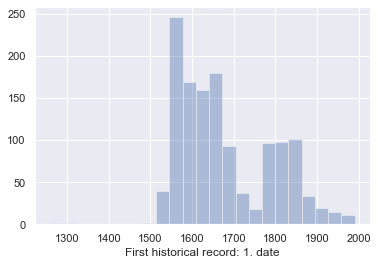

In [61]:
sns.distplot(Dates.astype(int), kde = False)

Why are some plants decribed earlier, some later?

In [62]:
By_species['Typical abundance where naturally occurring'].unique()

array(['nan', 'scattered', 'frequent', 'dominant'], dtype=object)

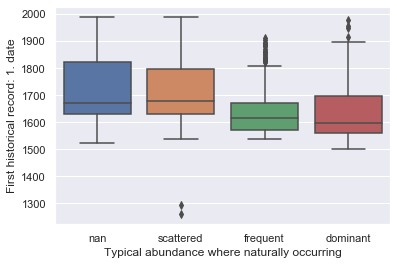

In [63]:
sns.boxplot(x="Typical abundance where naturally occurring", y="First historical record: 1. date", data=By_species)

nicer colours

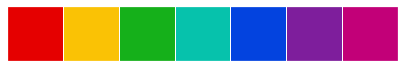

In [15]:
col_list = ["red", "goldenrod", "green",  "turquoise","blue",  "purple",  "magenta"]
sns.set_palette(sns.xkcd_palette(col_list))
sns.palplot(sns.color_palette())

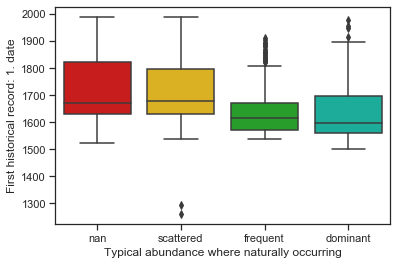

In [65]:
sns.set_style("ticks")
sns.set_palette(sns.xkcd_palette(col_list))
sns.despine()
sns.boxplot(x="Typical abundance where naturally occurring", y="First historical record: 1. date", data=By_species)

Some suggestion for rarer plants being described later?  
What about size?

In [16]:
By_species['Leaf area: in case of compound leaves undefined if leaf or leaflet; undefined if petiole and rhachis in- or excluded'].unique()

array(['nan', '100-1000', '1-10', '0.1-1', '1.5', '10-100', '<0.1',
       '>1000'], dtype=object)

What's up with the 1.5 value?

In [17]:
squint = By_species[By_species['Leaf area: in case of compound leaves undefined if leaf or leaflet; undefined if petiole and rhachis in- or excluded'] == '1.5']

In [18]:
len(squint)

1

In [19]:
squint

DataName       APG IV level 1 APG IV level 2 APG IV level 3 APG IV level 4  \
AccSpeciesName                                                               
Abies grandis             nan            nan            nan            nan   

DataName       APG IV level 5  Actual EvapoTranspiration  \
AccSpeciesName                                             
Abies grandis             nan                      597.0   

DataName       After-ripening requirement  Altitude  \
AccSpeciesName                                        
Abies grandis                         nan    1446.0   

DataName       Altitude (maximum recorded) Altitude (minimum recorded)  \
AccSpeciesName                                                           
Abies grandis                         1830                         nan   

DataName        Altitude (typical minimum)  Annual precipitation  \
AccSpeciesName                                                     
Abies grandis                        200.0                   NaN   

DataName       Annual seed dispersal Appendages on dispersal unit  \
AccSpeciesName                                                      
Abies grandis              irregular                        wings   

DataName        Average annual relative humidity  \
AccSpeciesName                                     
Abies grandis                               71.0   

DataName        Average number of ground frost days per year (sum) (FRS)  \
AccSpeciesName                                                             
Abies grandis                                               277.1          

DataName        British distribution (post 1949 records) Carnivory  \
AccSpeciesName                                                       
Abies grandis                                        NaN       nan   

DataName        Change Index  Chromosome cDNA content Chromosome number  \
AccSpeciesName                                                            
Abies grandis            NaN                34.465333                24   

DataName        Chromosome ploidy Cleistogamy Clonality  Cloud cover  \
AccSpeciesName                                                         
Abies grandis                 2.0         nan       nan         71.4   

DataName       Comments, notes, methods Dataset (1)  \
AccSpeciesName                                        
Abies grandis                       nan  TRY db 068   

DataName                                              Dataset (2) Dichogamy  \
AccSpeciesName                                                                
Abies grandis   Wirth C. The Functional Ecology of Trees (FET)...       nan   

DataName       Dicliny (monoeceous, dioecious, hermaphrodite)  \
AccSpeciesName                                                  
Abies grandis                                      monoecious   

DataName       Dispersal syndrome (agent)  \
AccSpeciesName                              
Abies grandis                        wind   

DataName       Dispersal unit (dispersule / diaspore) length  EW Index  \
AccSpeciesName                                                           
Abies grandis                                            nan       NaN   

DataName        Ecosystem rooting depth  Ellenberg indicator value: Light  \
AccSpeciesName                                                              
Abies grandis                       1.5                               NaN   

DataName        Ellenberg indicator value: Moisture  \
AccSpeciesName                                        
Abies grandis                                   NaN   

DataName        Ellenberg indicator value: Salt tolerance  \
AccSpeciesName                                              
Abies grandis                                         NaN   

DataName        Ellenberg indicator value: nitrogen  \
AccSpeciesName                                        
Abies grandis                                   NaN   

DataName        Ellenberg indicator

Correct this

In [20]:
By_species.loc['Abies grandis', 'Leaf area: in case of compound leaves undefined if leaf or leaflet; undefined if petiole and rhachis in- or excluded'] = '1-10'

In [21]:
By_species['Leaf area: in case of compound leaves undefined if leaf or leaflet; undefined if petiole and rhachis in- or excluded'].unique()

array(['nan', '100-1000', '1-10', '0.1-1', '10-100', '<0.1', '>1000'],
      dtype=object)

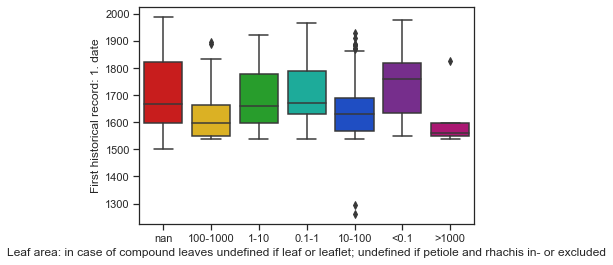

In [22]:
sns.set_style("ticks")
sns.set_palette(sns.xkcd_palette(col_list))
sns.despine()
sns.boxplot(x="Leaf area: in case of compound leaves undefined if leaf or leaflet; undefined if petiole and rhachis in- or excluded", y="First historical record: 1. date", data=By_species)

re-order by size of leaf

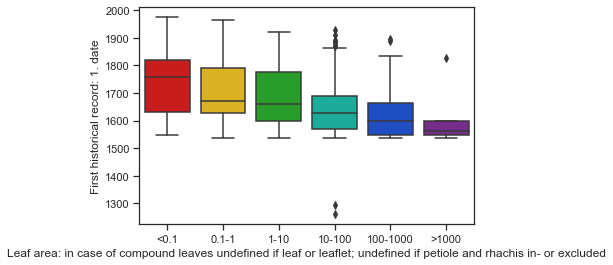

In [23]:
sns.set_style("ticks")
sns.set_palette(sns.xkcd_palette(col_list))
sns.despine()
sns.boxplot(x="Leaf area: in case of compound leaves undefined if leaf or leaflet; undefined if petiole and rhachis in- or excluded", y="First historical record: 1. date", data=By_species, order=["<0.1", "0.1-1", "1-10","10-100", "100-1000", ">1000"])

Years should be x axis

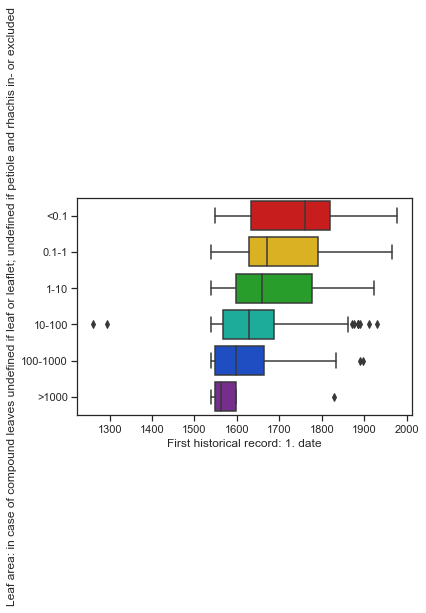

In [24]:
sns.set_style("ticks")
sns.set_palette(sns.xkcd_palette(col_list))
sns.despine()
sns.boxplot(y="Leaf area: in case of compound leaves undefined if leaf or leaflet; undefined if petiole and rhachis in- or excluded", x="First historical record: 1. date", data=By_species, order=["<0.1", "0.1-1", "1-10","10-100", "100-1000", ">1000"])

Sensible titles and y axis running large to small

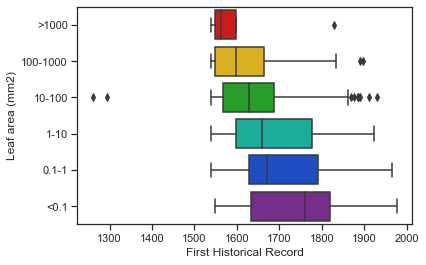

In [25]:
sns.set_style("ticks")
sns.set_palette(sns.xkcd_palette(col_list))
sns.despine()
ax = sns.boxplot(y="Leaf area: in case of compound leaves undefined if leaf or leaflet; undefined if petiole and rhachis in- or excluded", x="First historical record: 1. date", data=By_species, order=[">1000", "100-1000", "10-100", "1-10", "0.1-1", "<0.1"])
ax.set(xlabel='First Historical Record', ylabel='Leaf area (mm2)')
plt.show()

## Bigger leaved plants described earlier!

## How unique is the british flora?

In [80]:
Range = By_species["Number of European countries in which native"].dropna()

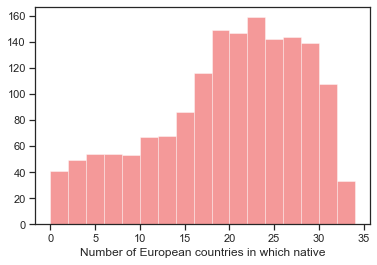

In [81]:
sns.distplot(Range.astype(int), kde = False)

Very few endemics - list them

In [82]:
By_species["First historical record: 1. date"] = pd.to_numeric(By_species["Number of European countries in which native"], errors='ignore')

In [86]:
By_species["Number of European countries in which native"].dropna().sort_values(ascending=True).head(20)

12      0.0
2543    1.0
2658    1.0
2657    1.0
1238    1.0
2653    1.0
2651    1.0
1119    1.0
1120    1.0
1343    1.0
1345    1.0
440     1.0
2613    1.0
1365    1.0
439     1.0
1349    1.0
1350    1.0
521     1.0
2188    1.0
408     1.0
Name: Number of European countries in which native, dtype: float64

In [83]:
endemic = By_species[By_species["Number of European countries in which native"]<2]

In [84]:
len(endemic)

41

List them

In [87]:
endemic['AccSpeciesName']

12                    Abies grandis
408           Calamagrostis scotica
439      Campanula portenschlagiana
440         Campanula poscharskyana
521                     Carex recta
669              Cochlearia micacea
674                Coincya wrightii
839              Cymbalaria pallida
948     EUPHRASIA HESLOP-HARRISONII
1107             Euphrasia cambrica
1108           Euphrasia campbellae
1112           Euphrasia marshallii
1119            Euphrasia rivularis
1120         Euphrasia rotundifolia
1177           Fumaria occidentalis
1238            Gentianella anglica
1343      Hieracium calenduliflorum
1345              Hieracium dewarii
1349             Hieracium hanburyi
1350         Hieracium holosericeum
1365            Hieracium senescens
1529            Lactuca macrophylla
1636            Limosella australis
2156          Potamogeton epihydrus
2188                Primula scotica
2543             Senecio cambrensis
2613        Sisyrinchium bermudiana
2651              Sorbus arr

Usual suspects - Sorbus, Euphrasia, Hawkweeds  
Students could look up the stories of these plants - Sorbus arranensis, Spartina anglica

How many are Archeopytes (pre-human part of UK flora)?

In [88]:
len(endemic[endemic["Species origin"]=='Neophyt in British Islands'])

32

In [89]:
len(endemic[endemic["Species origin"]=='Archeophyt in British Islands'])

8

Old UK-endemic species

In [91]:
endemic[endemic["Species origin"]=='Archeophyt in British Islands']['AccSpeciesName']

12                   Abies grandis
439     Campanula portenschlagiana
440        Campanula poscharskyana
839             Cymbalaria pallida
1529           Lactuca macrophylla
2156         Potamogeton epihydrus
2613       Sisyrinchium bermudiana
2681              Spartina anglica
Name: AccSpeciesName, dtype: object

Odd group. Recent hybrid species

In [92]:
from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

## Heat maps and chi-squared

Which of the categorical traits do I have most data for?

In [34]:
categorical = By_species.select_dtypes(['object']).columns
for x in categorical:
    print (x)

APG IV level 1
APG IV level 2
APG IV level 3
APG IV level 4
APG IV level 5
After-ripening requirement
Altitude (maximum recorded)
Altitude (minimum recorded)
Annual seed dispersal
Appendages on dispersal unit
Carnivory
Chromosome number
Cleistogamy
Clonality
Comments, notes, methods
Dataset (1)
Dataset (2)
Dichogamy
Dicliny (monoeceous, dioecious, hermaphrodite)
Dispersal syndrome (agent)
Dispersal unit (dispersule / diaspore) length
Epoch
Exposure
Family
Fertilization
Fine root diameter
First historical record: 2. site
Flow
Fossil record: 1. earliest record
Fossil record: 2. earliest postglacial record
Genera growth form
Germination requirements 1. chilling
Germination requirements 2. light
Germination requirements 3. temperature fluctuation
Germination type
Habitat / plot description
Heteromorphy
Heterophylly
Inbreeding
Incompatibility systems
Intensity of mycorrhizal infection
Leaf area: in case of compound leaves undefined if leaf or leaflet; undefined if petiole and rhachis in- or

In [35]:
cat = By_species[categorical]

In [36]:
cat.shape

(3031, 136)

In [37]:
cat.head(4)

DataName                    APG IV level 1 APG IV level 2 APG IV level 3  \
AccSpeciesName                                                             
ACAENA NOVAE-ZELANDIAE            Eudicots  Core Eudicots    Superrosids   
ACAENA NOVAE-ZELANDIAE Kirk            NaN            NaN            NaN   
ADIANTUM CAPILLUS-VENERIS              NaN            NaN            NaN   
ALISMA PLANTAGO-AQUATICA          Monocots            NaN            NaN   

DataName                    APG IV level 4 APG IV level 5  \
AccSpeciesName                                              
ACAENA NOVAE-ZELANDIAE              Rosids         Fabids   
ACAENA NOVAE-ZELANDIAE Kirk            NaN            NaN   
ADIANTUM CAPILLUS-VENERIS              NaN            NaN   
ALISMA PLANTAGO-AQUATICA               NaN            NaN   

DataName                    After-ripening requirement  \
AccSpeciesName                                           
ACAENA NOVAE-ZELANDIAE                             NaN   
ACAENA NOVAE-ZELANDIAE Kirk                        NaN   
ADIANTUM CAPILLUS-VENERIS                          NaN   
ALISMA PLANTAGO-AQUATICA                           NaN   

DataName                    Altitude (maximum recorded)  \
AccSpeciesName                                            
ACAENA NOVAE-ZELANDIAE                              NaN   
ACAENA NOVAE-ZELANDIAE Kirk                         NaN   
ADIANTUM CAPILLUS-VENERIS                           NaN   
ALISMA PLANTAGO-AQUATICA                            403   

DataName                    Altitude (minimum recorded) Annual seed dispersal  \
AccSpeciesName                                                                  
ACAENA NOVAE-ZELANDIAE                                0                   NaN   
ACAENA NOVAE-ZELANDIAE Kirk                         NaN                   NaN   
ADIANTUM CAPILLUS-VENERIS                           NaN                   NaN   
ALISMA PLANTAGO-AQUATICA                              0                   NaN   

DataName                    Appendages on dispersal unit  \
AccSpeciesName                                             
ACAENA NOVAE-ZELANDIAE                             hooks   
ACAENA NOVAE-ZELANDIAE Kirk                          NaN   
ADIANTUM CAPILLUS-VENERIS                            NaN   
ALISMA PLANTAGO-AQUATICA                             NaN   

DataName                                 Carnivory Chromosome number  \
AccSpeciesName                                                         
ACAENA NOVAE-ZELANDIAE       does not kill insects                42   
ACAENA NOVAE-ZELANDIAE Kirk                    NaN               NaN   
ADIANTUM CAPILLUS-VENERIS    does not kill insects                58   
ALISMA PLANTAGO-AQUATICA     does not kill insects                23   

DataName                    Cleistogamy  \
AccSpeciesName                            
ACAENA NOVAE-ZELANDIAE              NaN   
ACAENA NOVAE-ZELANDIAE Kirk         NaN   
ADIANTUM CAPILLUS-VENERIS           NaN   
ALISMA PLANTAGO-AQUATICA            NaN   

DataName                                                     Clonality  \
AccSpeciesName                                                           
ACAENA NOVAE-ZELANDIAE       Extensively creeping and rooting at nodes   
ACAENA NOVAE-ZELANDIAE Kirk                                        NaN   
ADIANTUM CAPILLUS-VENERIS               Little or no vegetative spread   
ALISMA PLANTAGO-AQUATICA                Little or no vegetative spread   

DataName                    Comments, notes, methods  \
AccSpeciesName                                         
ACAENA NOVAE-ZELANDIAE                           NaN   
ACAENA NOVAE-ZELANDIAE Kirk                      NaN   
ADIANTUM CAPILLUS-VENERIS          herbarium samples   
ALISMA PLANTAGO-AQUATICA                         NaN   

DataName                                  Dataset (1)  \
AccSpeciesName                                          
ACAENA NOVAE-ZELANDIAE        Royer 

In [175]:
cat = cat.replace('nan', np.NaN)

In [38]:
cat.isnull().sum(axis = 0)

DataName
APG IV level 1                                                                                                          1709
APG IV level 2                                                                                                          2086
APG IV level 3                                                                                                          2086
APG IV level 4                                                                                                          2226
APG IV level 5                                                                                                          2030
After-ripening requirement                                                                                              2927
Altitude (maximum recorded)                                                                                             1998
Altitude (minimum recorded)                                                                                         

Lots of data for:  
    AccSpeciesName   
    Woodiness   
    Tolerance to shade  
    Stem longevity  
    Spread (plant height versus plant width relationshp))  
    Plant life form (Raunkiaer life form)  
    Physical defences on leaves  
    Leaf shape: 2. outline  
    Leaf shape: 4. length versus breadth  

In [39]:
By_species = By_species.replace('nan', np.NaN)
By_species['AccSpeciesName'] = By_species.index

#### Do trees defend their leaves better than herbs?

In [29]:
By_species['Woodiness'].unique()

array(['woody', nan, 'non-woody', 'woody at base', 'non woody',
       'wood at base'], dtype=object)

In [30]:
By_species['Physical defences on leaves'].unique()

array(['soft hairs', nan, 'glabrous', 'hairy', 'stiff hairs', 'scales',
       'spines', 'thick cuticle', 'glandular hairs', 'dense hairs',
       'subglabrous', 'prickles', 'glandular', 'downy', 'spiny point',
       'visvid', 'viscid', 'stinging hairs'], dtype=object)

In [40]:
counts = By_species.groupby(['Woodiness', 'Physical defences on leaves'], as_index=False)['AccSpeciesName'].count()
counts.columns = ["Woodiness", "Physical defences on leaves", "count"]
count_matrix = counts.pivot("Woodiness", "Physical defences on leaves", "count")
count_matrix

Physical defences on leaves  dense hairs  downy  glabrous  glandular  \
Woodiness                                                              
non woody                            NaN    NaN       2.0        NaN   
non-woody                            9.0    NaN     687.0        6.0   
wood at base                         NaN    1.0       NaN        NaN   
woody                               10.0    NaN      97.0        1.0   
woody at base                        NaN    NaN      10.0        NaN   

Physical defences on leaves  glandular hairs  hairy  prickles  scales  \
Woodiness                                                               
non woody                                NaN    NaN       NaN     NaN   
non-woody                               36.0  145.0       3.0    19.0   
wood at base                             NaN    NaN       NaN     NaN   
woody                                    3.0   11.0       NaN     NaN   
woody at base                            2.0    2.0       1.0     NaN   

Physical defences on leaves  soft hairs  spines  spiny point  stiff hairs  \
Woodiness                                                                   
non woody                           NaN     1.0          NaN          NaN   
non-woody                         232.0     1.0          1.0         52.0   
wood at base                        NaN     NaN          NaN          NaN   
woody                              46.0     2.0          1.0          4.0   
woody at base                       6.0     NaN          NaN          1.0   

Physical defences on leaves  stinging hairs  subglabrous  thick cuticle  \
Woodiness                                                                 
non woody                               NaN          NaN            NaN   
non-woody                               2.0         10.0            6.0   
wood at base                            NaN          NaN            NaN   
woody                                   NaN          2.0            8.0   
woody at base                           NaN          NaN            NaN   

Physical defences on leaves  viscid  visvid  
Woodiness                                    
non woody                       NaN     NaN  
non-woody                       NaN     NaN  
wood at base                    NaN     NaN  
woody                           1.0     1.0  
woody at base                   NaN     NaN

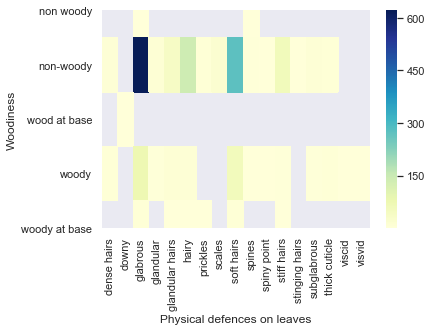

In [201]:
sns.heatmap(count_matrix, cmap="YlGnBu")

Too many categories!  
Simplify  

In [49]:
count_matrix = count_matrix.fillna(0)
count_matrix["defended"] = count_matrix["soft hairs"] + count_matrix['hairy'] + count_matrix['stiff hairs'] + count_matrix['glandular'] +  count_matrix['glandular hairs']  + count_matrix['scales']  + count_matrix['spines']  +  count_matrix['thick cuticle']  + count_matrix['dense hairs'] +  count_matrix['subglabrous'] +  count_matrix['prickles']  + count_matrix['downy']  + count_matrix['spiny point'] + count_matrix['visvid'] + count_matrix['viscid'] + count_matrix['stinging hairs']
new_matrix = count_matrix[["glabrous", "defended"]]

In [50]:
new_matrix

Physical defences on leaves  glabrous  defended
Woodiness                                      
non woody                         2.0       1.0
non-woody                       687.0     522.0
wood at base                      0.0       1.0
woody                            97.0      90.0
woody at base                    10.0      12.0

Need to deal with odd woody coding

In [51]:
new_matrix.loc['non-woody'] += new_matrix.loc['non woody']
new_matrix.drop(['non woody'], inplace=True)
new_matrix.loc['woody'] += new_matrix.loc['woody at base']
new_matrix.loc['woody'] += new_matrix.loc['wood at base']
new_matrix.drop(['woody at base'], inplace=True)
new_matrix.drop(['wood at base'], inplace=True)

/Users/catherine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/catherine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/catherine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

In [56]:
new_matrix

Physical defences on leaves  glabrous  defended
Woodiness                                      
non-woody                       689.0     523.0
woody                           107.0     103.0

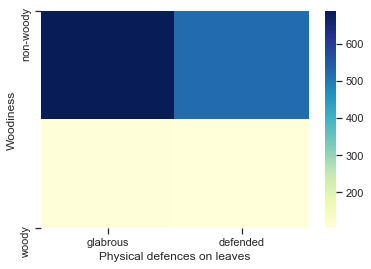

In [52]:
sns.heatmap(new_matrix, cmap="YlGnBu")

#### Are Compound leaves found only in high light species?

In [194]:
By_species['Tolerance to shade'].unique()

array(['none', nan, 'light', 'mid', 'deep'], dtype=object)

In [95]:
By_species['Leaf compoundness'].unique()

array(['compound', 'nan', 'simple', 'absent', 'modified', nan],
      dtype=object)

In [192]:
counts = By_species.groupby(['Leaf compoundness', 'Tolerance to shade'], as_index=False)['AccSpeciesName'].count()
counts.columns = ["Leaf compoundness", "Tolerance to shade", "count"]
count_matrix = counts.pivot("Leaf compoundness", "Tolerance to shade", "count")
count_matrix

Tolerance to shade  deep  light   mid    none
Leaf compoundness                            
absent               4.0    NaN   NaN    22.0
compound            15.0   17.0  19.0   259.0
modified             NaN    NaN   NaN     1.0
simple              61.0   71.0  19.0  1110.0

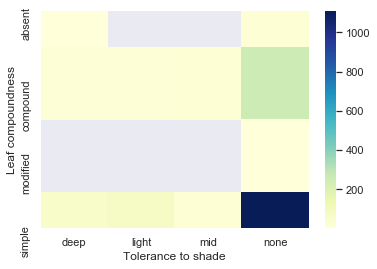

In [193]:
sns.heatmap(count_matrix, cmap="YlGnBu")

Most species not shade tolerance, most have simple leaves  

#### Are shade leaves thinner?

In [190]:
counts = By_species.groupby(['Ellenberg indicator value: Light', 'Leaf lamina thickness'], as_index=False)['AccSpeciesName'].count()
counts.columns = ["Ellenberg indicator value: Light", "Leaf lamina thickness", "count"]
count_matrix = counts.pivot("Ellenberg indicator value: Light", "Leaf lamina thickness", "count")
count_matrix

Leaf lamina thickness             0.2-0.5  0.5-1.0  1.0-2.0  <0.2  >2.0
Ellenberg indicator value: Light                                       
5.0                                   NaN      NaN      1.0   NaN   NaN
6.0                                   NaN      1.0      NaN   NaN   NaN
7.0                                   2.0      3.0      NaN   2.0   NaN
8.0                                   2.0      1.0      1.0   NaN   NaN
9.0                                   3.0      NaN      NaN   1.0   1.0

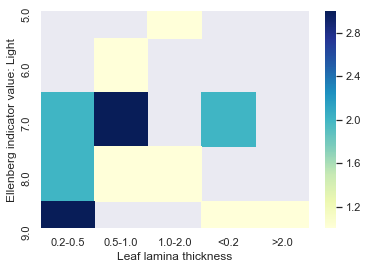

In [191]:
sns.heatmap(count_matrix, cmap="YlGnBu")

Too little data

### Chi squared test
#### Do trees better defend their leaves??  

In [53]:
from scipy import stats

In [54]:
stats.chi2_contingency(new_matrix)

(2.291176785222372, 0.13011124085656844, 1, array([[678.44726, 533.55274],
        [117.55274,  92.44726]]))

###
2.29 = Chi squared statstic  
0.13 = P value  
1 df  


Nicer lay out:

In [55]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(new_matrix)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
2.291176785222372


===Degrees of Freedom===
1


===P-Value===
0.13011124085656844


===Contingency Table===
[[678.44726 533.55274]
 [117.55274  92.44726]]


### Is breeding system linked to genome size and chromosome number?

In [ ]:
Chromosome data:
    Chromosome number
    Dichogamy
    Dicliny (monoeceous, dioecious, hermaphrodite)
    Inbreeding - 24 with data
    Incompatibility - 26 with data
    Flower sexual self-incompatibility mechanism
    Chromosome cDNA content
    Chromosome number
    Chromosome ploidy

In [10]:
By_species['Chromosome number'].summary()

AttributeError: 'Series' object has no attribute 'summary'

In [11]:
By_species['Dichogamy'].unique()

array(['markedly protogynous', 'nan', 'homogamous', 'weakly protogynous',
       'protandrous', 'entirely protandrous', 'protogynous',
       'weakly protandrous', 'markedly protandrous',
       'entirely protogynous'], dtype=object)

In [12]:
By_species['Dicliny (monoeceous, dioecious, hermaphrodite)'].unique()

array(['hermaphrodite', 'nan', 'monoecious', 'gynomonoecious',
       'andromonoecious', 'dioecious', 'gynodioecious', 'polygamous',
       'gynoandromonoecious', 'androdioecious', 'trioecious',
       'subdioecious'], dtype=object)

In [13]:
By_species['Inbreeding'].unique()

array(['nan', '20', '99.7', '2', '95', '97', '33', '56.7', '100', '85',
       '90', '90-95', '99', '98', '94.75'], dtype=object)

In [ ]:
Only 24 species with data.

In [15]:
By_species['Incompatibility systems'].unique()

array(['nan', 'present, mechanism unknown', 'di-allelic sporophytic',
       'gametophytic, >2 loci', 'multi-allelic sporophytic',
       'gametophytic, 2 loci', 'sporophytic', 'gametophytic',
       'gametophytic, 1 locus'], dtype=object)

In [17]:
By_species['Chromosome cDNA content'].unique()

array([  0.65   ,       nan,  10.25   ,  25.425  ,   2.49   ,  34.46533,
         2.35489,   1.87444,   8.27096,  10.88   ,  28.6    ,   0.725  ,
        12.93945,   9.07158,   4.36   ,   8.65   ,   3.3    ,  27.55   ,
        39.69799,  36.3    ,   1.278  ,  14.2    ,  17.82   ,   1.23   ,
         1.46632,   4.75   ,   9.625  ,   2.26667,  19.27   ,  24.64   ,
         3.5    ,  29.11914,  17.79286,   6.46   ,  12.29167,  11.8    ,
         4.5    ,   1.145  ,   3.2    ,   1.1    ,   2.15   ,   2.2    ,
         1.05333,   1.     ,   0.9825 ,   0.5    ,  33.35417,   1.395  ,
         0.745  ,   8.61667,   1.8675 ,   2.55   ,  12.78   ,   8.3094 ,
         9.3188 ,  21.8    ,   0.39   ,  12.76833,   4.0625 ,  12.25588,
         1.725  ,  11.26667,   2.34185,   4.3    ,   3.9    ,  25.3    ,
        17.83   ,   1.53   ,   2.24   ,   3.40667,   2.8    ,   1.42   ,
         2.27071,   1.295  ,   4.36333,   2.9    ,   0.9    ,  22.32   ,
         1.14278,   1.07139,   2.51029,   1.71029, 

In [18]:
By_species['Chromosome number'].unique()

array(['42', 'nan', '58', '23', '14', '52', '24', '39.2125', '45',
       '27.72', '32', '16', '36', 'c. 44', '40', '20', '97.857142857',
       '28', '56', '48', '43.272727273', '64', '21', '105-109', 'c. 120',
       'c. 96', 'c. 100', '110', 'c. 144', '104-110', 'c. 101', '103-106',
       'c. 105', '27', '19.511538462', '16 + 2B', '18', '32 + 0-2S',
       '33.6', '117', '47.333333333', '32.285714286', '30', '22', 'c. 48',
       '17.047619048', '12', '21.333333333', '10', '26', '80', '34',
       '27.260869565', '54', '84', '144', '126', '72', '23.294117647',
       '27.377777778', '44', '32.307692308', '36.4', '68', 'c. 104',
       '184', '19.733333333', '42 + 2B', '38', '24.75', '24.214285714',
       '35.945945946', '53.2', '18.333333333', '39', '26.666666667',
       '32.833333333', '78', '56-91', '6', '44.666666667', '40.8',
       '24.105263158', '51.84', '38-44', '52.514285714', 'c. 74', 'c. 66',
       '62', '60', '46', 'c. 52', '73', '70', '29.411764706', '18.5',
       

In [19]:
By_species['Chromosome ploidy'].unique()

array([     nan,  2.     ,  6.     ,  3.0125 ,  2.92857,  3.08   ,
        3.27692,  6.18182,  3.     ,  4.     ,  2.46154,  2.4    ,
        2.44444,  2.1    ,  2.6    ,  2.58537,  3.06522,  3.33333,
        2.5    ,  3.91111,  2.30769,  2.66667,  2.73333,  3.5    ,
        5.13514,  2.8    ,  2.33333,  3.6    ,  7.     ,  2.85714,
        6.46429,  2.57143,  2.70588,  2.81818,  4.44444,  2.27778,
        8.66667,  6.5    ,  5.5    ,  3.66667,  3.125  ,  2.63529,
        3.375  ,  2.26667,  5.     ,  2.54545,  4.9    ,  4.66667,
        2.25   ,  3.2    ,  4.5    ,  3.71014,  2.0625 ,  5.2    ,
        2.13043,  2.36842,  4.11765,  2.29167,  3.67568,  9.66667,
        3.25   ,  2.78   ,  2.16667,  2.03125,  3.03226,  4.5303 ,
        2.2    ,  3.11111,  4.72727,  2.12121,  2.0146 ,  3.75   ,
        4.63158,  2.14286,  2.07692,  3.16667,  2.40171,  3.05263,
        4.33333,  2.52308,  2.68333, 30.     ,  5.625  ,  8.     ,
        2.46429,  3.14286,  2.45161,  5.34884,  3.54545,  2.35

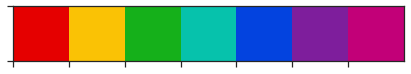

In [22]:
col_list = ["red", "goldenrod", "green",  "turquoise","blue",  "purple",  "magenta"]
sns.set_palette(sns.xkcd_palette(col_list))
sns.palplot(sns.color_palette())

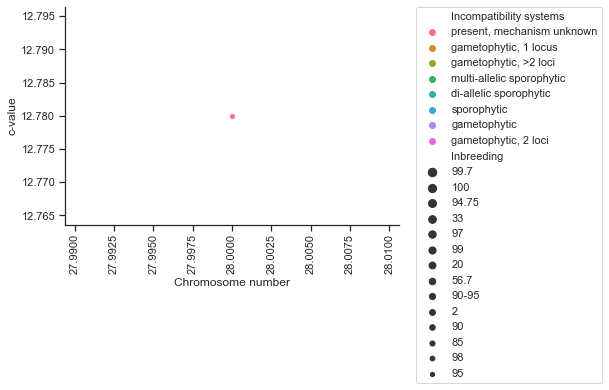

In [54]:
sns.set_style("ticks")
sns.set_palette(sns.xkcd_palette(col_list))
ax = sns.scatterplot(y="Chromosome cDNA content", x="Chromosome number", data=By_species, size = "Inbreeding", hue = "Incompatibility systems")
sns.despine()
plt.ylabel('c-value')
plt.xlabel('Chromosome number')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.savefig('Genome_size_breeding.png',bbox_inches='tight')

In [60]:
squint = By_species[By_species['Inbreeding'] == '90-95']

In [61]:
squint

AccSpeciesName APG IV level 1 APG IV level 2 APG IV level 3  \
522  Primula vulgaris       Eudicots  Core Eudicots  Superasterids   

    APG IV level 4 APG IV level 5  Actual EvapoTranspiration  \
522       Asterids            NaN                      643.0   

    After-ripening requirement  Altitude Altitude (maximum recorded)  \
522                        NaN     909.0                         853   

     Altitude (minimum recorded)  Altitude (typical minimum)  \
522                          0.0                         NaN   

     Annual precipitation Annual seed dispersal Appendages on dispersal unit  \
522                1108.0                   NaN                    elaiosome   

     Average annual relative humidity  \
522                              74.0   

     Average number of ground frost days per year (sum) (FRS)  \
522                                              197.1          

     British distribution (post 1949 records)              Carnivory  \
522                                       NaN  does not kill insects   

     Change Index  Chromosome cDNA content  Chromosome number  \
522          0.16                    1.014               22.0   

     Chromosome ploidy Cleistogamy                       Clonality  \
522                2.0         NaN  Little or no vegetative spread   

     Cloud cover Comments, notes, methods Dataset (1)  \
522         66.9                      NaN  TRY db 161   

                                           Dataset (2) Dichogamy  \
522  Campetella G. Leaf Traits in Central Apennines...       NaN   

    Dicliny (monoeceous, dioecious, hermaphrodite) Dispersal syndrome (agent)  \
522                                  hermaphrodite                       ants   

    Dispersal unit (dispersule / diaspore) length  EW Index  \
522                                           NaN      4.68   

     Ecosystem rooting depth  Ellenberg indicator value: Light  \
522                      1.0                               NaN   

     Ellenberg indicator value: Moisture  \
522                                  NaN   

     Ellenberg indicator value: Salt tolerance  \
522                                        NaN   

     Ellenberg indicator value: nitrogen  \
522                                  4.0   

     Ellenberg indicator value: pH (reaction)  End of flowering Epoch  \
522                                       6.0               NaN   PPH   

    Exposure       Family  Fern  and moss spore width (diameter)  \
522      NaN  Primulaceae                                    NaN   

        Fertilization Fine root diameter  First historical record: 1. date  \
522  obligatory cross                NaN                            1538.0   

    First historical record: 2. site Flow  Flower pollen ovule ratio  \
522                              NaN  NaN                     3062.5   

     Flowering periode: peak month Fossil record: 1. earliest record  \
522                            NaN                               NaN   

    Fossil record: 2. earliest postglacial record  \
522                                           NaN   

     Fraction of absorbed photosynthetic active radiation (FAPAR) of the site  \
522                                           0.546153                          

     GPP of the site Genera growth form Germination requirements 1. chilling  \
522           1480.6                  H                                  NaN   

    Germination requirements 2. light  \
522                               NaN   

    Germination requirements 3. temperature fluctuation Germination type  \
522                                                NaN               NaN   

    Habitat / plot description Heteromorphy Heterophylly  \
522                        NaN    dimorphic          NaN   

     Identifier within contributed dataset (ID) Inbreeding  \
522                                     76502.0      90-95   

    Incompatibility systems Intensity of mycorrhizal infection  \
522    

In [62]:
By_species.loc['Primula vulgaris', 'Inbreeding'] = '95'

In [57]:
By_species['Chromosome number'] = By_species['Chromosome number'].astype(float)

In [63]:
By_species['Inbreeding'] = By_species['Inbreeding'].astype(float)

ValueError: could not convert string to float: '90-95'

TypeError: unsupported operand type(s) for +: 'int' and 'str'

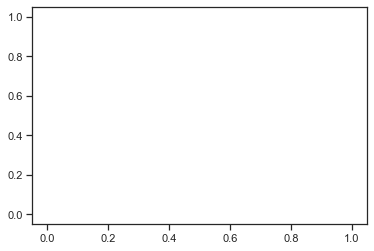

In [58]:
sns.set_style("ticks")
sns.set_palette(sns.xkcd_palette(col_list))
ax = sns.scatterplot(y="Chromosome cDNA content", x="Inbreeding", data=By_species)
sns.despine()
plt.ylabel('c-value')
plt.xlabel('Inbreeding_levels')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.savefig('Genome_size_breeding.png',bbox_inches='tight')

No handles with labels found to put in legend.


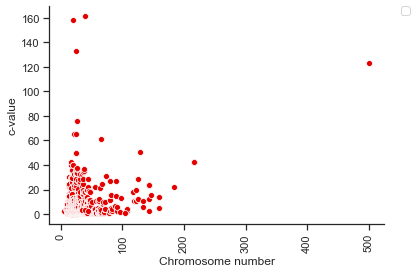

In [59]:
sns.set_style("ticks")
sns.set_palette(sns.xkcd_palette(col_list))
ax = sns.scatterplot(y="Chromosome cDNA content", x="Chromosome number", data=By_species)
sns.despine()
plt.ylabel('c-value')
plt.xlabel('Chromosome number')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.savefig('Genome_size_breeding.png',bbox_inches='tight')

Text(0.5, 6.799999999999979, 'Chromosome number')

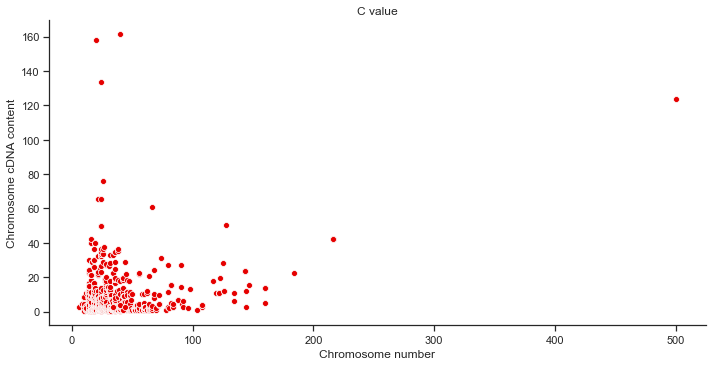

In [53]:
sns.relplot(
    data=By_species,
    x='Chromosome number',
    y='Chromosome cDNA content',
    aspect=2
)

plt.title("C value")
plt.xlabel("Chromosome number")

### Not much data for breeding system - check rarity

In [ ]:
Typical abundance where naturally occurring
Species rarity status

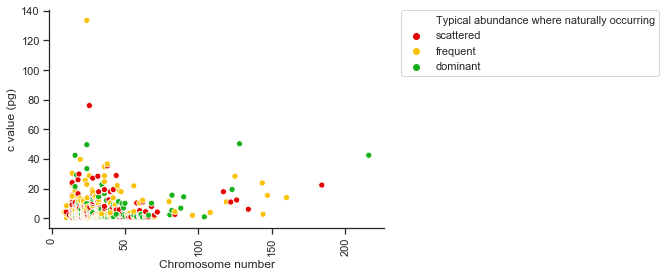

In [64]:
sns.set_style("ticks")
sns.set_palette(sns.xkcd_palette(col_list))
ax = sns.scatterplot(y="Chromosome cDNA content", x="Chromosome number", data=By_species, hue = "Typical abundance where naturally occurring")
sns.despine()
plt.ylabel('c value (pg)')
plt.xlabel('Chromosome number')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.savefig('rare_genome_struc.png',bbox_inches='tight')

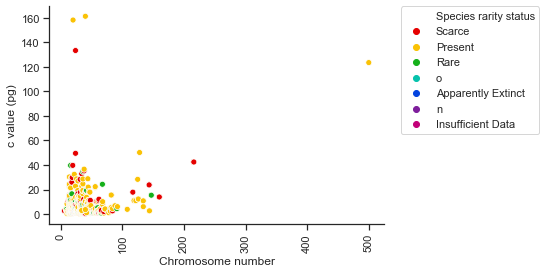

In [65]:
sns.set_style("ticks")
sns.set_palette(sns.xkcd_palette(col_list))
ax = sns.scatterplot(y="Chromosome cDNA content", x="Chromosome number", data=By_species, hue = "Species rarity status")
sns.despine()
plt.ylabel('c value (pg)')
plt.xlabel('Chromosome number')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.savefig('rare_genome_struc2.png',bbox_inches='tight')

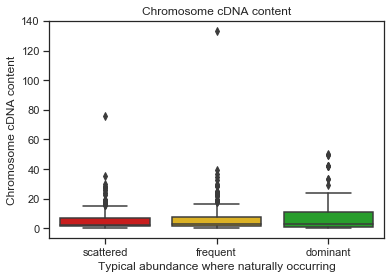

In [68]:
sns.boxplot(
    data=By_species,
    x='Typical abundance where naturally occurring',
    y='Chromosome cDNA content')

plt.title("Chromosome cDNA content")
plt.xlabel("Typical abundance where naturally occurring")
plt.savefig('rare_genome_struc3.png',bbox_inches='tight')

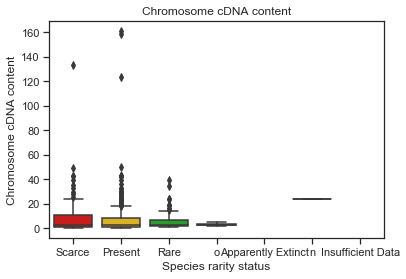

In [69]:
sns.boxplot(
    data=By_species,
    x='Species rarity status',
    y='Chromosome cDNA content')

plt.title("Chromosome cDNA content")
plt.xlabel("Species rarity status")
plt.savefig('rare_genome_struc4.png',bbox_inches='tight')

## Plotting quantitative data  
Linear relationships  
transforming data  
ANOVA  

#### Questions to address:  
Why do some plants have such large genomes?  
Is it limited those N-rich enough?  
Is c value related to Leaf Nitrogen?

In [209]:
By_species.describe()

DataName  Actual EvapoTranspiration     Altitude  Altitude (typical minimum)  \
count                   1384.000000  1394.000000                   69.000000   
mean                     532.036850   440.014706                  335.452174   
std                      150.402403   579.728702                  280.307534   
min                      120.000000    -4.000000                    0.000000   
25%                      424.000000    67.000000                   90.000000   
50%                      534.500000   256.000000                  274.000000   
75%                      631.000000   564.125000                  600.000000   
max                     1193.000000  4680.000000                 1000.000000   

DataName  Annual precipitation  Average annual relative humidity  \
count              1619.000000                       1383.000000   
mean               1046.675726                         73.445770   
std                 320.573459                         10.716209   
min                 553.000000                          2.000000   
25%                 833.000000                         70.000000   
50%                 986.000000                         75.500000   
75%                1127.000000                         81.000000   
max                3218.000000                         89.000000   

DataName  Average number of ground frost days per year (sum) (FRS)  \
count                                           1383.000000          
mean                                             204.544758          
std                                               59.714585          
min                                                6.000000          
25%                                              174.175000          
50%                                              206.800000          
75%                                              235.800000          
max                                              339.700000          

DataName  British distribution (post 1949 records)  Change Index  \
count                                   350.000000   1338.000000   
mean                                    132.988571     -0.009245   
std                                     203.933384      0.891124   
min                                       1.000000     -4.570000   
25%                                      29.250000     -0.477500   
50%                                      57.000000     -0.110000   
75%                                     128.000000      0.350000   
max                                    1243.000000      4.700000   

DataName  Chromosome cDNA content  Chromosome ploidy  Cloud cover  \
count                 1269.000000        1074.000000  1383.000000   
mean                     7.349786           3.015831    70.452748   
std                     12.242082           1.414942    12.008004   
min                      0.100000           2.000000    26.900000   
25%                      1.563571           2.000000    62.800000   
50%                      2.822273           2.666667    72.700000   
75%                      8.475000           3.468750    80.300000   
max                    161.347500          30.000000    89.300000   

DataName     EW Index  Ecosystem rooting depth  \
count     1582.000000              1271.000000   
mean         4.495177                 0.897286   
std          1.641202                 0.369841   
min          0.000000                 0.300000   
25%          3.680000                 0.600000   
50%          4.410000                 0.800000   
75%          5.037500                 1.100000   
max         10.000000                 2.800000   

DataName  Ellenberg indicator value: Light  \
count                           614.000000   
mean                              7.291531   
std                               1.453362   
min                               2.000000   
25%                               7.000000   
50%                               8.000000   
75%                        

What is Chromosome cDNA content?

In [47]:
UKFlora[UKFlora["DataName"] == "Chromosome cDNA content"].head(2)

SpeciesName  AccSpeciesID       AccSpeciesName  ObservationID  \
3922  Acer pseudoplatanus           855  Acer pseudoplatanus        1454485   
3924  Acer pseudoplatanus           855  Acer pseudoplatanus        1454486   

      ObsDataID  TraitID                                  TraitName  DataID  \
3922   10765720    224.0  Species genotype: chromosome cDNA content     603   
3924   10765722    224.0  Species genotype: chromosome cDNA content     603   

                     DataName            OriglName OrigValueStr OrigUnitStr  \
3922  Chromosome cDNA content  2C DNA content (pg)          2.4          pg   
3924  Chromosome cDNA content  2C DNA content (pg)          4.0          pg   

     ValueKindName OrigUncertaintyStr UncertaintyName Replicates  StdValue  \
3922        Single                NaN             NaN        NaN       2.4   
3924        Single                NaN             NaN        NaN       4.0   

     UnitName  RelUncertaintyPercent  OrigObsDataID  ErrorRisk  \
3922       pg                    NaN      3191212.0    4.18648   
3924       pg                    NaN            NaN   18.51100   

                                              Reference Comment  Unnamed: 27  
3922  Fitter, A. H. and H. J. Peat 1994. The Ecologi...    5.26          NaN  
3924  Fitter, A. H. and H. J. Peat 1994. The Ecologi...    5.26          NaN

Chromosome cDNA content is the 2c value in pg.  Might expect higher ammounts of DNA in plants with lower C:N ratios?  
    Or maybe in nitrogen rich enviroments?

Text(0.5, 6.799999999999979, 'Leaf carbon/nitrogen (C/N)')

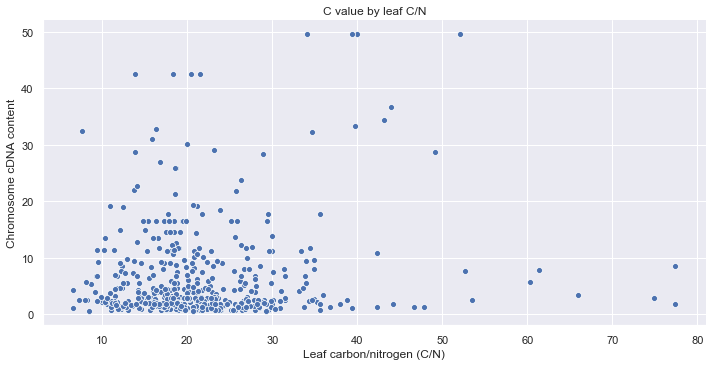

In [210]:
sns.relplot(
    data=By_species,
    x='Leaf carbon/nitrogen (C/N) ratio',
    y='Chromosome cDNA content',
    aspect=2
)

plt.title("C value by leaf C/N")
plt.xlabel("Leaf carbon/nitrogen (C/N)")

Does this dependant on Nitrogen richness in the soil?

Ellenberg indicator value, not continous data so boxplot 

Text(0.5, 0, 'Ellenberg indicator value: nitrogen')

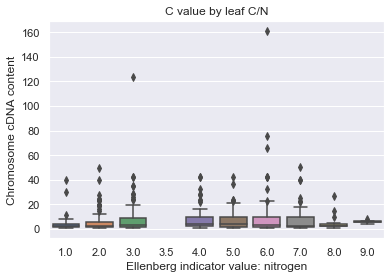

In [212]:
sns.boxplot(
    data=By_species,
    x='Ellenberg indicator value: nitrogen',
    y='Chromosome cDNA content')

plt.title("C value by leaf C/N")
plt.xlabel("Ellenberg indicator value: nitrogen")

Strong outliers at highish and lowish nitrogen.  
What are these?  

In [215]:
By_species.sort_values('Chromosome cDNA content', ascending=False).head(5)

DataName         AccSpeciesName APG IV level 1 APG IV level 2 APG IV level 3  \
1972          Paris quadrifolia       Monocots            NaN            NaN   
3003               Viscum album       Eudicots  Core Eudicots  Superasterids   
1170      Fritillaria meleagris       Monocots            NaN            NaN   
1899      Ophioglossum vulgatum            NaN            NaN            NaN   
1625            Lilium martagon       Monocots            NaN            NaN   

DataName APG IV level 4 APG IV level 5  Actual EvapoTranspiration  \
1972                NaN            NaN                      416.0   
3003                NaN            NaN                      575.0   
1170                NaN            NaN                      538.0   
1899                NaN            NaN                      439.0   
1625                NaN            NaN                      425.0   

DataName After-ripening requirement  Altitude Altitude (maximum recorded)  \
1972                       absolute     178.0                         360   
3003                            NaN      98.0                         NaN   
1170                            NaN      -1.0                         NaN   
1899                            NaN      72.0                         NaN   
1625                            NaN     252.0                         NaN   

DataName Altitude (minimum recorded)  Altitude (typical minimum)  \
1972                               0                         NaN   
3003                               0                         NaN   
1170                             NaN                         NaN   
1899                             NaN                         NaN   
1625                             NaN                         NaN   

DataName  Annual precipitation Annual seed dispersal  \
1972                     877.0             irregular   
3003                     788.0                   NaN   
1170                     688.0             irregular   
1899                     964.0                   NaN   
1625                     874.0                   NaN   

DataName Appendages on dispersal unit  Average annual relative humidity  \
1972                              NaN                              83.5   
3003                              NaN                              75.0   
1170                            wings                              82.0   
1899                              NaN                              84.0   
1625                              NaN                              76.0   

DataName  Average number of ground frost days per year (sum) (FRS)  \
1972                                                  272.9          
3003                                                  169.7          
1170                                                  188.5          
1899                                                  240.5          
1625                                                  272.1          

DataName  British distribution (post 1949 records)              Carnivory  \
1972                                           NaN  does not kill insects   
3003                                           NaN  does not kill insects   
1170                                          34.0  does not kill insects   
1899                                           NaN  does not kill insects   
1625                                           NaN  does not kill insects   

DataName  Change Index  Chromosome cDNA content Chromosome number  \
1972             -0.68               161.347500                40   
3003              0.97               158.266667                20   
1170              0.86               133.403356      25.384615385   
1899               NaN               123.550000               900   
1625              0.83                75.967917         24 + 1-2B   

DataName  Chromosome ploidy Cleistogamy  \
1972               8.000000         NaN   
3003               2.000000         NaN   
1170            

Yup - odd stuff, Herb-Paris, Mistletoe and the crazy frillarias.  
Remove outliers (>60) and re-plot

Text(0.5, 0, 'Ellenberg indicator value: nitrogen')

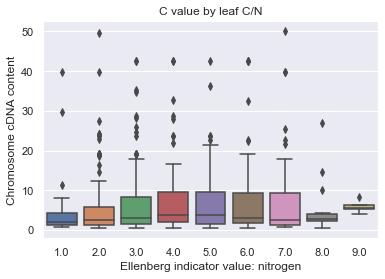

In [218]:
df = By_species[By_species["Chromosome cDNA content"] < 60]
sns.boxplot(
    data=df,
    x='Ellenberg indicator value: nitrogen',
    y='Chromosome cDNA content')

plt.title("C value by leaf C/N")
plt.xlabel("Ellenberg indicator value: nitrogen")

Other nitrogen measures?

NDVI of the site  
NPP of the site (2)  
Soil N content per ground area  

Text(0.5, 6.799999999999979, 'Soil N content per ground area')

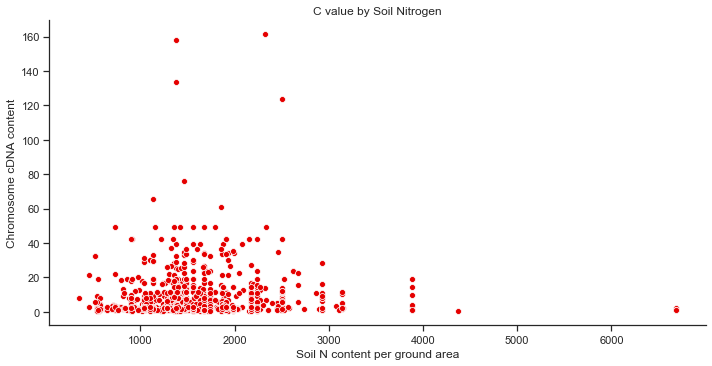

In [236]:
sns.relplot(
    data=By_species,
    x='Soil N content per ground area',
    y='Chromosome cDNA content',
    aspect=2
)

plt.title("C value by Soil Nitrogen")
plt.xlabel("Soil N content per ground area")

Text(0.5, 6.799999999999979, 'Leaf carbon/nitrogen (C/N) ratio')

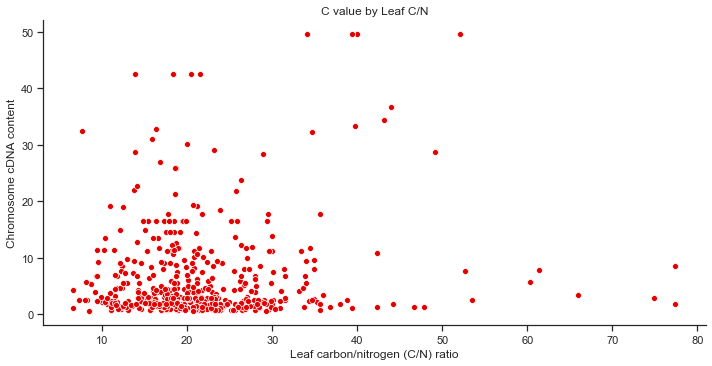

In [237]:
sns.relplot(
    data=By_species,
    y='Chromosome cDNA content',
    x='Leaf carbon/nitrogen (C/N) ratio',
    aspect=2
)

plt.title("C value by Leaf C/N")
plt.xlabel("Leaf carbon/nitrogen (C/N) ratio")

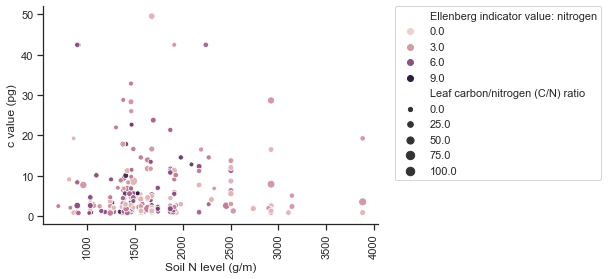

In [238]:
sns.set_style("ticks")
sns.set_palette(sns.xkcd_palette(col_list))
ax = sns.scatterplot(y="Chromosome cDNA content", x="Soil N content per ground area", data=By_species, size = "Leaf carbon/nitrogen (C/N) ratio", hue = "Ellenberg indicator value: nitrogen")
sns.despine()
plt.ylabel('c value (pg)')
plt.xlabel('Soil N level (g/m)')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.savefig('C-value_soilN.png',bbox_inches='tight')

Nothing leaping out - maybe even a negative?  
Do an ANOVA anyway  

In [223]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [224]:
model = ols('By_species["Chromosome cDNA content"] ~ By_species["Soil N content per ground area"]', By_species).fit()
print(model.summary())

                                      OLS Regression Results                                     
Dep. Variable:     By_species["Chromosome cDNA content"]   R-squared:                       0.002
Model:                                               OLS   Adj. R-squared:                  0.001
Method:                                    Least Squares   F-statistic:                     2.059
Date:                                   Tue, 07 Jan 2020   Prob (F-statistic):              0.152
Time:                                           15:08:54   Log-Likelihood:                -4529.1
No. Observations:                                   1152   AIC:                             9062.
Df Residuals:                                       1150   BIC:                             9072.
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

The left part of the first table provides basic information about the model fit:  
Dep. Variable Which variable is the response in the model  
Model What model you are using in the fit  
Method How the parameters of the model were calculated  
No. Observations The number of observations (examples)  
DF Residuals Degrees of freedom of the residuals. Number of observations - number of parameters  
DF Model Number of parameters in the model (not including the constant term if present)  
The right part of the first table shows the goodness of fit Element Description  
R-squared The coefficient of determination. A statistical measure of how well the regression line approximates the real data points  
Adj. R-squared The above value adjusted based on the number of observations and the degrees-of-freedom of the residuals  
F-statistic A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals  
Prob (F-statistic) The probability that you would get the above statistic, given the null hypothesis that they are unrelated  
Log-likelihood The log of the likelihood function.  
AIC The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model.  
BIC The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters.  
The second table reports for each of the coefficients Description The name of the term in the model  
coef The estimated value of the coefficient  
std err The basic standard error of the estimate of the coefficient. More sophisticated errors are also available.  
t The t-statistic value. This is a measure of how statistically significant the coefficient is.  
P > |t| P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.  
[95.0% Conf. Interval] The lower and upper values of the 95% confidence interval  

Finally, there are several statistical tests to assess the distribution of the residuals   Skewness A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line).  
Kurtosis A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails).  
Omnibus D'Angostino's test. It provides a combined statistical test for the presence of skewness and kurtosis.  
Prob(Omnibus) The above statistic turned into a probability  
Jarque-Bera A different test of the skewness and kurtosis  
Prob (JB) The above statistic turned into a probability  
Durbin-Watson A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis  
Cond. No A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other).  

Nothing to see here..

In [225]:
model = ols('By_species["Chromosome cDNA content"] ~ By_species["Soil N content per ground area"]* By_species["Leaf carbon/nitrogen (C/N) ratio"]', By_species).fit()
print(model.summary())

                                      OLS Regression Results                                     
Dep. Variable:     By_species["Chromosome cDNA content"]   R-squared:                       0.023
Model:                                               OLS   Adj. R-squared:                  0.017
Method:                                    Least Squares   F-statistic:                     3.639
Date:                                   Tue, 07 Jan 2020   Prob (F-statistic):             0.0128
Time:                                           15:10:12   Log-Likelihood:                -1665.2
No. Observations:                                    468   AIC:                             3338.
Df Residuals:                                        464   BIC:                             3355.
Df Model:                                              3                                         
Covariance Type:                               nonrobust                                         
                    

### Co-variance

How correalated are the environmental measures?  

Eniviromental variables:

In [ ]:
"Actual EvapoTranspiration","
Altitude","
Altitude (maximum recorded)","
Altitude (minimum recorded)","
Altitude (typical minimum)","
Annual precipitation","
Average annual relative humidity","
Average number of ground frost days per year (sum) (FRS)","
Cloud cover","
Fraction of absorbed photosynthetic active radiation (FAPAR) of the site","
GPP of the site","
January mean temperature","
July mean temperature","
Latitude","
Length of growing season (LGP)","
Longitude","
Maximum Green Vegetation Fraction","
Mean annual sum of potential evapotranspiration (PET)","
Mean annual temperature (MAT)","
Mean clear-sky surface radiation budget from ERBE global: Global shortwave radiation budget data derived from 5 Years of ERBE measurements","
Mean cloud forcing surface radiation budget from ERBE global: Global shortwave radiation budget data derived from 5 Years of ERBE measurements","
Mean cloud surface radiation budget from ERBE global: Global shortwave radiation budget data derived from 5 Years of ERBE measurements","
Mean number of wet days per year","
Mean sum of annual precipitation (PPT / MAP / TAP)","
NDVI of the site","
NPP of the site (2)","
Net primary productivity of the site (NPP)","
Precipitation of Coldest Quarter","
Precipitation of Driest Month","
Precipitation of Driest Quarter","
Precipitation of Warmest Quarter","
Precipitation of Wettest Month","
Precipitation of Wettest Quarter","
Soil C content per ground area","
Soil N content per ground area","
Soil bulk density","
Soil field capacity","
Soil ph","
Soil plant available water capacity of rooting zone (derived from remote sensing) 1","
Soil plant available water capacity of rooting zone (derived from remote sensing) 2","
Soil profile available water capacity","
Soil thermal capacity","
Soil water content (SWC)","
Soil wilting point","
Solar radiation (kJ m-2 day-1)","
Temperature sum of growing degree days (GDD)","
Temperature: Annual Range","
Temperature: Isothermality (BIO2/BIO7) (* 100)","
Temperature: Max Temperature of Warmest Month","
Temperature: Mean Diurnal Range (Mean of monthly (max temp - min temp))","
Temperature: Mean Temperature of Coldest Quarter","
Temperature: Mean Temperature of Driest Quarter","
Temperature: Mean Temperature of Warmest Quarter","
Temperature: Mean Temperature of Wettest Quarter","
Temperature: Min Temperature of Coldest Month","
Temperature: Seasonality (standard deviation *100)","
Terrestrial chlorophyll index of the site","
Water vapor pressure (kPa)","
Wetness/Humidity/Aridity of area where samples were taken","
Wind speed (m s-1)","

Leaf Measures:

How correlated are the leaf measures?  

In [ ]:
"Leaf Relative water content (water content / water content at saturation)","
Leaf Water content (molar) per leaf dry mass (WCd)","
Leaf Water content saturating (molar) (WCs)","
Leaf Water content total (molar) (WCt)","
Leaf area index of the site (LAI)","
Leaf carbon content per dry mass","
Leaf carbon/nitrogen (C/N) ratio","
Leaf carotenoid content per dry mass","
Leaf chlorophyll a content per dry mass","
Leaf chlorophyll a/b ratio","
Leaf chlorophyll b content per dry mass","
Leaf chlorophyll content (a+b) per dry mass","
Leaf dry matter content per leaf water-saturated mass (LDMC)","
Leaf petiole length","
Leaf respiration per dry mass","
Leaf thickness","
Leaf tissue density","
Leaf transpiration (molar) per dry mass","
Leaf transpiration rate per dry mass (daytime)","
Leaf water content per leaf dry mass","
Leaf water content per leaf water-saturated mass (LWC, 1-LDMC)","
Leaf water content saturating","
Leaf water content total","
Leaf water saturation deficit","
Photosynthesis per leaf dry mass (Amass)","
Plant relative growth rate (RGR)","
SLA: undefined if petiole in- or excluded"

In [277]:
leaf = By_species[["AccSpeciesName","Leaf Relative water content (water content / water content at saturation)","Leaf Water content (molar) per leaf dry mass (WCd)","Leaf Water content saturating (molar) (WCs)","Leaf Water content total (molar) (WCt)","Leaf area index of the site (LAI)","Leaf carbon content per dry mass","Leaf carbon/nitrogen (C/N) ratio","Leaf carotenoid content per dry mass","Leaf chlorophyll a content per dry mass","Leaf chlorophyll a/b ratio","Leaf chlorophyll b content per dry mass","Leaf chlorophyll content (a+b) per dry mass","Leaf dry matter content per leaf water-saturated mass (LDMC)","Leaf petiole length","Leaf respiration per dry mass","Leaf thickness","Leaf tissue density","Leaf transpiration (molar) per dry mass","Leaf transpiration rate per dry mass (daytime)","Leaf water content per leaf dry mass","Leaf water content per leaf water-saturated mass (LWC, 1-LDMC)","Leaf water content saturating","Leaf water content total","Leaf water saturation deficit","Photosynthesis per leaf dry mass (Amass)","Plant relative growth rate (RGR)","SLA: undefined if petiole in- or excluded"]]

In [279]:
leaf.set_index("AccSpeciesName", inplace = True) 

In [314]:
env = By_species[["AccSpeciesName","Actual EvapoTranspiration","Altitude","Altitude (maximum recorded)","Altitude (minimum recorded)","Altitude (typical minimum)","Annual precipitation","Average annual relative humidity","Average number of ground frost days per year (sum) (FRS)","Cloud cover","Fraction of absorbed photosynthetic active radiation (FAPAR) of the site","GPP of the site","January mean temperature","July mean temperature","Latitude","Length of growing season (LGP)","Longitude","Maximum Green Vegetation Fraction","Mean annual sum of potential evapotranspiration (PET)","Mean annual temperature (MAT)","Mean clear-sky surface radiation budget from ERBE global: Global shortwave radiation budget data derived from 5 Years of ERBE measurements","Mean cloud forcing surface radiation budget from ERBE global: Global shortwave radiation budget data derived from 5 Years of ERBE measurements","Mean cloud surface radiation budget from ERBE global: Global shortwave radiation budget data derived from 5 Years of ERBE measurements","Mean number of wet days per year","Mean sum of annual precipitation (PPT / MAP / TAP)","NDVI of the site","NPP of the site (2)","Net primary productivity of the site (NPP)","Precipitation of Coldest Quarter","Precipitation of Driest Month","Precipitation of Driest Quarter","Precipitation of Warmest Quarter","Precipitation of Wettest Month","Precipitation of Wettest Quarter","Soil C content per ground area","Soil N content per ground area","Soil bulk density","Soil field capacity","Soil ph","Soil plant available water capacity of rooting zone (derived from remote sensing) 1","Soil plant available water capacity of rooting zone (derived from remote sensing) 2","Soil profile available water capacity","Soil thermal capacity","Soil water content (SWC)","Soil wilting point","Solar radiation (kJ m-2 day-1)","Temperature sum of growing degree days (GDD)","Temperature: Annual Range","Temperature: Isothermality (BIO2/BIO7) (* 100)","Temperature: Max Temperature of Warmest Month","Temperature: Mean Diurnal Range (Mean of monthly (max temp - min temp))","Temperature: Mean Temperature of Coldest Quarter","Temperature: Mean Temperature of Driest Quarter","Temperature: Mean Temperature of Warmest Quarter","Temperature: Mean Temperature of Wettest Quarter","Temperature: Min Temperature of Coldest Month","Temperature: Seasonality (standard deviation *100)","Terrestrial chlorophyll index of the site","Water vapor pressure (kPa)","Wetness/Humidity/Aridity of area where samples were taken","Wind speed (m s-1)"]]

In [315]:
env.set_index("AccSpeciesName", inplace = True) 

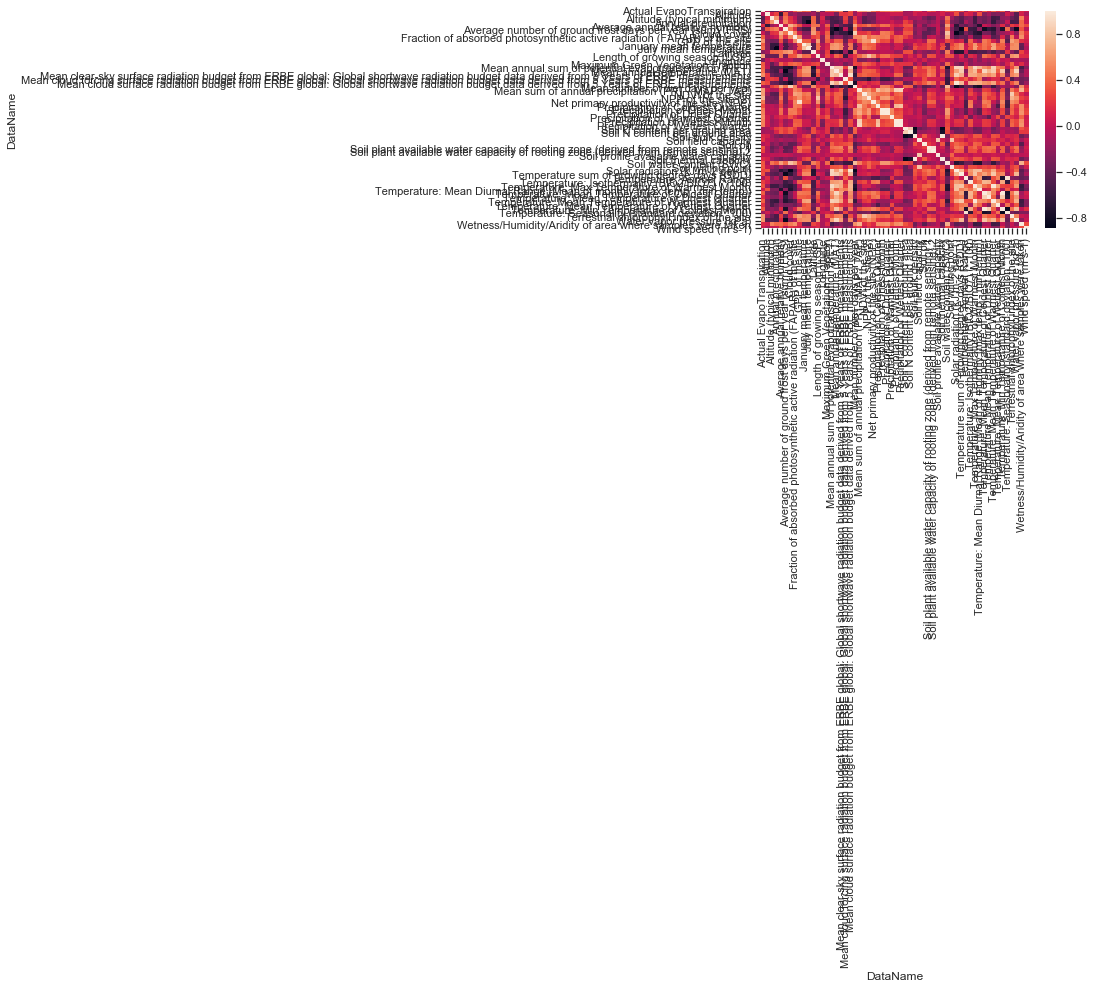

In [281]:
# calculate the correlation matrix
corr = env.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

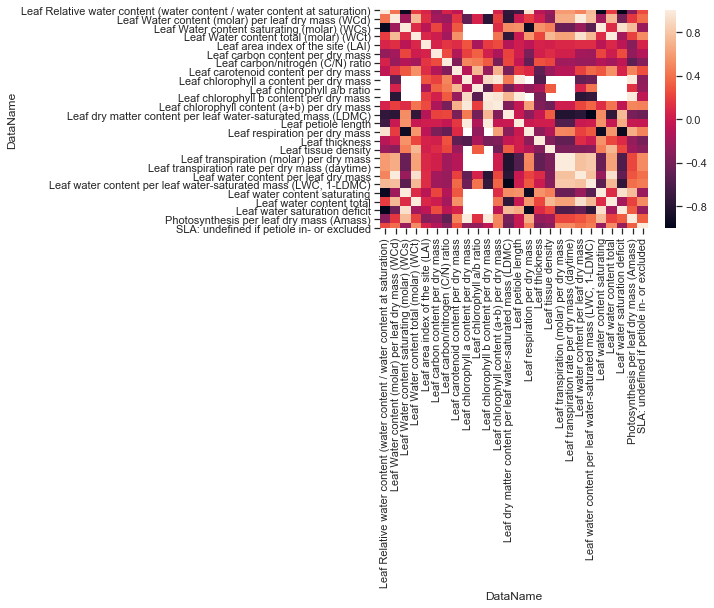

In [282]:
# calculate the correlation matrix
corr = leaf.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

missing some data.  

### Which plants grow in similar habitats?
Cluster species by environmental variables

In [316]:
env = env.apply(pd.to_numeric, errors = 'coerce')

In [319]:
env = env.dropna()

In [320]:
# generate the linkage matrix
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

Z = linkage(env, 'ward')
c, coph_dists = cophenet(Z, pdist(env))
c

0.8265405857371884

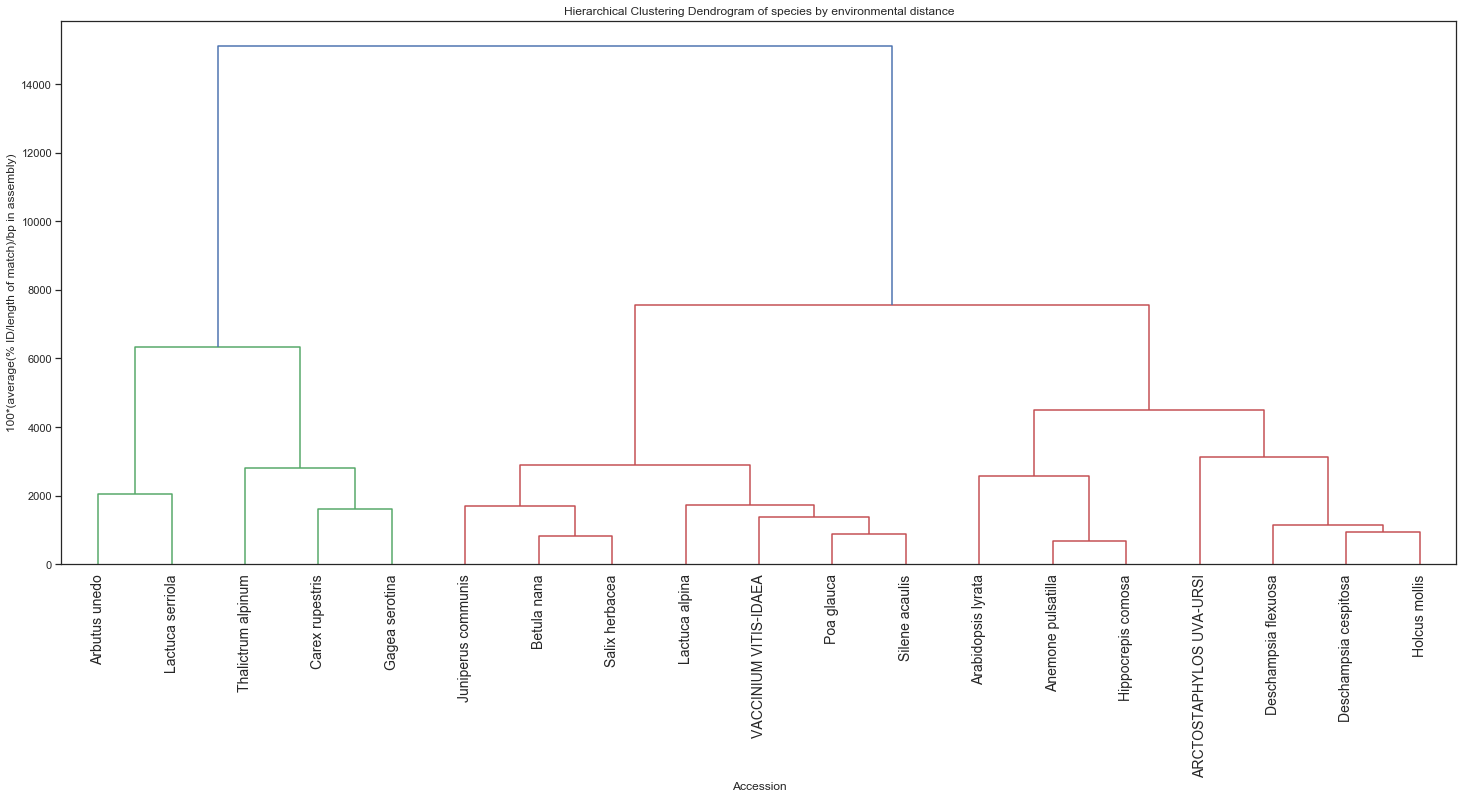

In [321]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram of species by environmental distance')
plt.xlabel('Accession')
plt.ylabel('100*(average(% ID/length of match)/bp in assembly)')
dendrogram(
    Z,
    labels=(env.index),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
)
plt.show()

Very few species have the full set of env variables which allows this analysis to be done.
Unexpected results - Thalictrum and Carex.  Juniper, dwarf birch and dwarf willow is right though

### PCA

Maybe a PCA of the ENV traits to plot species by habitat?

### Picking biological question to address  

Possible:  

How do invasive species differ from archeophytes?    
Is the only difference between herbs and trees woodiness or is there more to it?  
What characteristics are typical of chalk plants? What group of plants are they most similar to?  
What features are associated with high photosynthetic capacity?  Which might be drivers and which results?  